In [1]:
# Character `!` in the beginning of the line indicates a shell command
!pip install sklearn_crfsuite

# import of the crf library
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics


     |████████████████████████████████| 743 kB 46.4 MB/s 


In [7]:
sizes = ["100","500","1000","5000","10000"]
# Select available size (0-4) that you want to use
docsize = sizes[2]
data_dir = "kh_data_" + docsize
file_name = data_dir + "_200b.zip"


In [8]:
# Download the file from `url` and save it
import urllib.request
base_url = "https://github.com/phylypo/segmentation-crf-khmer/raw/master/data/"
url = base_url + file_name
print("Downloading from:", url)
urllib.request.urlretrieve(url, file_name)

('kh_data_1000_200b.zip', <http.client.HTTPMessage at 0x7fe6bb3681d0>)

In [9]:
# Run shell command to extract files

# remove previous existing directory for rerun
!rm -rf {data_dir}
print("- Unzipping the file and show last few extracted files:")
!unzip {file_name} | tail -10

print("- Count the number of files:")
!ls -al {data_dir}/*_seg*.txt | wc -l

- Unzipping the file and show last few extracted files:
  inflating: kh_data_1000/458563_seg_200b.txt  
  inflating: kh_data_1000/458564_orig.txt  
  inflating: kh_data_1000/458564_seg_200b.txt  
  inflating: kh_data_1000/458565_orig.txt  
  inflating: kh_data_1000/458565_seg_200b.txt  
  inflating: kh_data_1000/458566_orig.txt  
  inflating: kh_data_1000/458566_seg_200b.txt  
  inflating: kh_data_1000/458567_orig.txt  
  inflating: kh_data_1000/458567_seg_200b.txt  
  inflating: kh_data_1000/meta.txt   
- Count the number of files:
1000


In [10]:
!cat kh_data_100/451807_seg_200b.txt
!cat kh_data_100/451807_orig.txt

cat: kh_data_100/451807_seg_200b.txt: No such file or directory
cat: kh_data_100/451807_orig.txt: No such file or directory


In [11]:
import glob
import re

path = data_dir + '/*_seg_200b.txt'  #  earlier format: *_seg.txt
files=glob.glob(path)

# global variables that use through out
seg_text = []
orig_text = []
# unique id of the article that can be matched to docId in meta.txt
doc_ids = []
for file in files:
  filenum = re.search(r'\d+_', file).group(0)
  doc_ids.append(filenum.replace("_",""))
  f=open(file, 'r')
  lines = f.readlines()
  f.close()
  seg_text.append(lines)
  
  # limit to 9K to avoid memory issue
  if len(seg_text) >= 9000: break #kcc=9000, char:5000, crash char on 7000
  
  # read orig text -- comment out (10K docs which do not have orig text)
  f=open(file.replace('_seg_200b.txt', '_orig.txt'), 'r')
  lines = f.readlines()
  f.close()
  orig_text.append(lines)
  
print("number of file:", len(files))
print("number of doc_ids:", len(doc_ids)) # can see the origial text
print("len of seg_text:", len(seg_text), ' sample data[0][0]:', repr(seg_text[0][0]))
print("len of orig_text:", len(orig_text), ' sample data[0][0]:', repr(orig_text[0][0]))


number of file: 1000
number of doc_ids: 1000
len of seg_text: 1000  sample data[0][0]: '\u200bឧត្តមសេនីយ៍\u200bឯក \u200bស \u200bថេត \u200bដឹកនាំ\u200bកិច្ចប្រជុំ\u200bស្តី\u200bអំពី\u200bកិច្ចការពារ\u200bសន្តិសុខ\u200b \u200bសណ្តាប់ធ្នាប់\u200b ក្នុង\u200bពិធី\u200bបុណ្យ\u200bឯករាជ្យ\u200bជាតិ\u200b \u200bបុណ្យ\u200bអ៊ំ\u200bទូក\u200b \u200bបណ្តែត\u200bប្រទី\u200bប \u200bអក\u200bអំបុក\u200b \u200bសំពះ\u200bព្រះខែ\n'
len of orig_text: 1000  sample data[0][0]: 'ឧត្តមសេនីយ៍ឯក ស ថេត ដឹកនាំកិច្ចប្រជុំស្តីអំពីកិច្ចការពារសន្តិសុខ សណ្តាប់ធ្នាប់ ក្នុងពិធីបុណ្យឯករាជ្យជាតិ បុណ្យអ៊ំទូក បណ្តែតប្រទីប អកអំបុក សំពះព្រះខែ\n'


In [12]:
# see other sample data - full first article
# (the 100K zip data do not have orig text to save space)
idx = 0
spacer = '\u2022'
print("First segmented text article has %d sentences/lines." %len(orig_text[idx]))
for i, sentence in enumerate(orig_text[idx]):
  print(i, ". Original : %s" %orig_text[idx][i].strip().replace('\u200b',spacer))
  print(i, ". Segmented: %s" %seg_text[idx][i].strip().replace('\u200b',spacer))

First segmented text article has 4 sentences/lines.
0 . Original : ឧត្តមសេនីយ៍ឯក ស ថេត ដឹកនាំកិច្ចប្រជុំស្តីអំពីកិច្ចការពារសន្តិសុខ សណ្តាប់ធ្នាប់ ក្នុងពិធីបុណ្យឯករាជ្យជាតិ បុណ្យអ៊ំទូក បណ្តែតប្រទីប អកអំបុក សំពះព្រះខែ
0 . Segmented: •ឧត្តមសេនីយ៍•ឯក •ស •ថេត •ដឹកនាំ•កិច្ចប្រជុំ•ស្តី•អំពី•កិច្ចការពារ•សន្តិសុខ• •សណ្តាប់ធ្នាប់• ក្នុង•ពិធី•បុណ្យ•ឯករាជ្យ•ជាតិ• •បុណ្យ•អ៊ំ•ទូក• •បណ្តែត•ប្រទី•ប •អក•អំបុក• •សំពះ•ព្រះខែ
1 . Original : ភ្នំពេញ ៖ នៅរសៀលថ្ងៃអង្គារ៍ ៩រោច ខែអស្សុច ឆ្នាំកុរ ឯកស័ក ព.ស ២៥៦៣ ត្រូវនឹងថ្ងៃទី២២ ខែតុលា ឆ្នាំ២០១៩ ឯកឧត្តម ឧត្តមសេនីយ៍ឯក ស ថេត អគ្គស្នងការរង និងជាស្នងការនគរបាលរាជធានីភ្នំពេញ បានអញ្ជើញជាអធិបតីភាពក្នុងកិច្ចប្រជុំស្តីអំពីកិច្ចការពារសន្តិសុខ សណ្តាប់ធ្នាប់ ក្នុងពិធីបុណ្យឯករាជ្យជាតិ បុណ្យអ៊ំទូក បណ្តែតប្រទីប អកអំបុក សំពះព្រះខែ ដែលនឹងប្រព្រឹត្តទៅនៅថ្ងៃទី០៩-១០-១១-១២ ខែវិច្ឆកា ឆ្នាំ២០១៩ កិច្ចប្រជុំនេះ ក៏មានការចូលរួមពីលោក លោកស្រីស្នងការរង នាយការិយាល័យ អធិការ និងអធិការរង ដែលពាក់ព័ន្ធក្នុងកិច្ចការនេះផងដែរ។
1 . Segmented: •ភ្នំពេញ• •៖ •នៅ•រសៀល•ថ្ងៃអង្គារ៍• ៩ រោច •ខែ•អស្សុច •ឆ្នាំ•ក

In [13]:
words = {}
word_count = 0
sentence_count = 0
wordspref = {}
for i, text in enumerate(seg_text):
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        sentence_count += 1
        for phrase in sentence.split():
          for word in phrase.split('\u200b'):
            if len(word)==0 : continue
            word_count += 1
            words[word] = 1 if word not in words.keys() else words[word] + 1
            pref = word.strip('\u200b')[:1]
            if pref in wordspref:
              wlist = wordspref[pref]
              wlist.add(word)
              wordspref[pref] = wlist
            else: wordspref[pref] = set(word)
print("total number of articles:", len(seg_text))
print("total number of sentences:", sentence_count, " words:", word_count)
print("total number of distinct words:", len(words))
print("total number of different starts-with characters:", len(wordspref))

print("Count number of words begin with: > 100")
for ws in sorted(wordspref):
    s = wordspref[ws]
    if (len(s)>100) : print("letter:", ws, " count:", len(s))

from collections import Counter
d = Counter(words)
print("Most frequent words:", d.most_common()[:20])

print("Most lease 20 words:", d.most_common()[-20:])

#for c in range(ord('ក'), ord('ឤ')):
#  print(chr(c))

### For 9K articles
#total number of articles: 9000
#total number of sentences: 87369
#total number of words: 46171
### For 100 articles (old *.seg.txt)
#total number of sentences: 1028  words: 35359
#total number of distinct words: 4628
#total number wordspref: 139

total number of articles: 1000
total number of sentences: 8422  words: 324904
total number of distinct words: 14452
total number of different starts-with characters: 186
Count number of words begin with: > 100
letter: A  count: 159
letter: B  count: 143
letter: C  count: 168
letter: H  count: 102
letter: M  count: 181
letter: P  count: 123
letter: S  count: 248
letter: T  count: 121
letter: ក  count: 1653
letter: ខ  count: 243
letter: គ  count: 295
letter: ច  count: 420
letter: ជ  count: 335
letter: ដ  count: 289
letter: ត  count: 277
letter: ថ  count: 126
letter: ទ  count: 411
letter: ធ  count: 144
letter: ន  count: 201
letter: ប  count: 1036
letter: ផ  count: 216
letter: ព  count: 446
letter: ភ  count: 258
letter: ម  count: 454
letter: យ  count: 165
letter: រ  count: 499
letter: ល  count: 216
letter: វ  count: 301
letter: ស  count: 1339
letter: ហ  count: 261
letter: អ  count: 815
letter: ១  count: 208
letter: ២  count: 118
Most frequent words: [('បាន', 6654), ('។', 6062), ('និង', 541

In [14]:
# finding some words
w = 'សុភ' #'ឧត្តរ' #'ពិពិធកម្ម'#"អាមេរិក"
if w in words.keys(): print("found word ", w, "count:", words[w])

# test finding string
found = []
for i, text in enumerate(seg_text):
    for sentence in text:
        if w in sentence: found.append(sentence)
print("total # sentences found:", len(found))
for f in found:
  print("-sentence: %s" %(repr(f)))

total # sentences found: 78
-sentence: ' \u200bសាកសព\u200bជនរងគ្រោះ\u200bមាន\u200bឈ្មោះ\u200b \u200bអង \u200bសុភារិទ្ធឹ \u200bភេទ\u200bប្រុស\u200b \u200bអាយុ ១៨ \u200bឆ្នាំ\u200b មុខរបរ\u200bសិស្ស \u200bស្នាក់\u200bនៅ\u200bភូមិ\u200bឬ\u200bស្សី \u200bសង្កាត់\u200bបារាយណ៍\u200b \u200bក្រុង\u200bដូន\u200bកែវ \u200bខេត្ត\u200bតាកែវ\u200b។\n'
-sentence: '\u200bមន្រ្តី\u200bនគរបាល\u200bព្រហ្មទណ្ឌ\u200b \u200bស្រុក\u200b \u200bកំពង់លែង\u200bបាន\u200bឲ្យដឹង\u200bថា\u200b \u200bជនរងគ្រោះ\u200bឈ្មោះ\u200b ឃុត \u200bសុភា \u200bភេទ\u200bប្រុស\u200b \u200bអាយុ\u200b ៥៥ ឆ្នាំ\u200b មាន\u200bទីលំនៅ\u200bភូមិ\u200bទំនប់\u200b \u200bឃុំ\u200bទំនប់\u200b \u200bស្រុក\u200bកំពង់លែង \u200bខេត្ត\u200bកំពង់ឆ្នាំង\u200b។\n'
-sentence: '\u200bប្រិយមិត្ត\u200bជាច្រើន\u200bប្រាកដជា\u200bជ្រាប\u200bហើយ\u200bថា\u200b \u200bសព្វ\u200bថ្ងៃ\u200bនេះ\u200bពិធី\u200bការិនី\u200bល្បី\u200bឈ្មោះ\u200bអ្នកនាង\u200b \u200bកែវ \u200bចាន់\u200bនិមល \u200bកំពុងតែ\u200bរួមរស់\u200bជាមួយនិង\u200bក្រុមគ្រួសារ\u200bយ៉ាង\u200bមាន

In [15]:
#Correction List

# the str assume \200b wrapped around any spaces -- this can be removed during output
# the first set use 200b string that may not visible in the note book. 
# Windows 10 shows as middle dot in Colab Classic Mode.
# the bottom set us \u200b instead for easy to spot
def get_correction_list():
  fixes=[]
  #fix bad segmented data - especially proper noun
  fixes.append(['អា​ខោន​','អាខោន​']) #account 

  #fixes.append(['','']) #u200bប៊ុល\u200bហ្គារី \u200b,  \u200bហុង\u200bគ្រី  Hungary
  return fixes


fixes = get_correction_list()
print("count", len(fixes), " data[0]:", fixes[0])

count 1  data[0]: ['អា\u200bខោន\u200b', 'អាខោន\u200b']


In [16]:
def correct_str(str):
  for f in fixes:
    str = str.replace(f[0], f[1])
  return str

def cleanup_str(str):
  str = str.strip('\u200b').strip()
  str = str.replace("  ", " ") # clean up 2 spaces to 1
  str = str.replace(" ", "\u200b \u200b")   # ensure 200b around space
  # clean up
  str = str.replace("\u200b\u200b", '\u200b')   # clean up dupe 200b
  str = str.replace("\u200b\u200b", '\u200b')   # in case multiple
  str = correct_str(str) # assume space has 200b wrapped around
  
  # remove special characters
  str = str.replace(u"\u2028", "") # line separator
  str = str.replace(u"\u200a", "")  # hair space
  str = str.strip().replace('\n','').replace('  ',' ')
  return str

# setup training data using seg
sentences = list()
for i, text in enumerate(seg_text):
    for sentence in text:
        sentences.append(cleanup_str(sentence))
print("total len of sentences:", len(sentences))

# id=99
# print("id:",doc_ids[id])
# for i,s in enumerate(seg_text[id]):
#   print("sample sentence: %s" %(cleanup_str(s)))
#   print("orig sentence: %s" %(repr(orig_text[id][i])))

total len of sentences: 8422


In [17]:
# search more match text in the correction list
import re
total = 0
for sen in sentences[0:813]: #todo search small set only
  for f in fixes:
    m = [m.start() for m in re.finditer(f[0], sen)]
    n = [m.start() for m in re.finditer(f[1], sen)]
    if len(m) >0:
      total += len(m)
      s = sen[m[0]:(m[0]+20)]
      #if (len(m)) > 0: print(total, "len:", len(m), " str:", repr(f[0]), "sen:", sen)
      #print("match: search=", repr(f[0]), "fix:", repr(f[1]), " sen:", repr(s))
      
print("total corrections:",total, " total sen:", len(sentences)) #127 -> 147/871

total corrections: 0  total sen: 8422


In [18]:
# search Orig text
found = []
s = "អាក្រក់".strip()
#s = "លោក".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  #print("start idx:", sidx, eidx, "len:", len(sen))
  #print("Found s:", repr(sen[sidx:eidx]))
  print("Found s:", sen[sidx:eidx].replace('\u200b', spacer))


total len of found: 39
Found s: តគេដោយវិធីអាក្រក់ទេ យេីងតែងរេីសយកវិធីឈ្នះពួកនោះវិញដោយកា
Found s: ស្សធម៌យ៉ាងអាក្រក់បំផុត របស់ពិភពលោក ។

Found s: ឯងជាគំរូដ៏អាក្រក់បំផុតក្នុងនាមជាប្តីនិងឪពុកម្នាក់ លោកគិ
Found s: ្យ•កាន់តែ•អាក្រក់•ថែមទៀត•លើ អ្វី•ដែល•លោក មហា•ធៀ ម៉ូ•ហា•
Found s: ៅ•កាន់•តែ•អាក្រក់ ដោយ•ក្រុមហ៊ុន•អាកាសចរណ៍•ទាំងអស់•បាន•ទ
Found s: តែ•ចៃដន្យ•អាក្រក់•បាន•បុក•រថយន្ត•ធំ•ពីក្រោយ•បណ្តាល•ឲ្យ•
Found s: តែ•ចៃដន្យ•អាក្រក់•ក៏•បុក•គូថ•រថយន្ត•ធំ•ដឹ•ទូ•កុង•ទី•ន័•
Found s: តែ•ចៃដន្យ•អាក្រក់•បុក•រថយន្ត•ធំ•ពីក្រោយ បណ្តាល•ឲ្យ•ឆាបឆ
Found s: តែ•ចៃដន្យ•អាក្រក់•ក៏•បុក•គូថ•រថយន្ត•ធំ•ដឹក•ទូ•កុង•ទី•ន័
Found s: តគេដោយវិធីអាក្រក់ទេ។

Found s: ំង តែគំនិតអាក្រក់បែបនេះនឹងមិនទទួលជោគជ័យឡើយ។

Found s: •ពាក្យ•ដ៏•អាក្រក់•មួយ។

Found s: •ពាក្យ•ដ៏•អាក្រក់•មួយ»។

Found s: ា•ជា•ប្តី•អាក្រក់•ក្បត់•ប្រពន្ធ•ទៅ•មាន•ទំនាក់ទំនង•ស្នេហ
Found s: ត•នាំ•រឿង•អាក្រក់ និង នៅតែ•បន្ត•វ៉ៃ•ប្រហារ•ទៅ•លោក និង ធ
Found s: •ដោយ•វិធី•អាក្រក់•ទេ• •។

Found s: ថា•ជា•រឿង•អាក្រក់•បំផុត•មួយ•ក្នុង•ប្រវត្តិសាស្ត្រ•កាណាដ
Found s: ចូល•ចំហាយ•អាក្រក់•ប

In [19]:
#search segmented text

#អ្នក ក្តៅ ចិត្ត  <= អ្នកក្តៅចិត្ត, តួរ ចិត្ត អាក្រក់<= តួរចិត្ត អាក្រក់,  ថាមពល<=ថា មពល, ម្យ៉ាងទៀត<=ម្យ៉ាង ទៀត, កិច្ចការពារ <=កិច្ច ការពារ, 
#មហា អំណាច <= មហាអំណាច , អំពើហិង្សា<=អំពើ ហិង្សា, ញាំ ក្រូច ថ្លុង<=ញាំក្រូចថ្លុង , ខ ប៉េងប៉ោះ<=ខ ប៉េងប៉ោះ, 
#\u200bម\u200bតិ\u200b, ម៉ៅ•សេ•ទុង=>ម៉ៅ•សេទុង•

# search final text
s = "ម្អ"
spacer = '\u2022'
found = []
for i, text in enumerate(sentences): #enumerate(seg_text):
    if s in text: found.append(text)
print("total len of found:", len(found))
for sen in found:
  idx = sen.find(s)
  sidx = idx - 10 if idx>10 else 0
  eidx = idx + 45 if idx+45<len(sen) else len(sen)
  print("Found s:", sen[sidx:eidx].replace('\u200b',spacer))


total len of found: 86
Found s: នុង•ការកែលម្អ•ផ្លូវ•នេះ•ឲ្យ•កាន់តែ•ប្រសើរឡើង•។
Found s: •ព័ត៌មាន•លម្អិត•មិន•ទាន់•មាន•នៅឡើយ• •កិច្ចព្រមព្រៀង•ថ្ម
Found s: •ពី•សាលា•ចម្អិត•អាហារ•ល្បីល្បាញ•មួយ•នៅ•ទីក្រុង•នោះ•។
Found s: ់•ចូលរួម•សម្អាត•សំរាម• •ដើម្បី•អោយ•ប្រទេសជាតិ•មាន•សោភ័ណ
Found s: •ថែរក្សា•សម្អាត•ទីក្រុង• •និង•ប្រទេស•រស់•នៅ•របស់•យើង•អោ
Found s: ងារ• •ថត•សម្អាង•ការ• •មិន•ចេះ•ដាច់•នោះ•ទេ•។
Found s: តង់• •ការសម្អាត•ក្រុង• •ការទស្សនា•សត្វ•ផ្សោត• •និង•រមណី
Found s: ក•សិក្សា•លម្អិត•អំពី•លក្ខណៈ•ពិសេស•ៗ•នៃ•ស្មាតហ្វូន•កូន•ក
Found s: ្វើ•ការកែលម្អ•សេវា•សាធារណៈ•ក្នុង•វិស័យ•សុខាភិ• •បាល•ឱ្យ
Found s: មាន•ការកែលម្អ•ជាប្រចាំ• •ដើម្បី•យើង•មាន•ប្រជាជន•ប្រកបដោ
Found s: សេស•ការកែលម្អ• •សោភ័ណ្ឌភាព•ទីក្រុង• •និង•ការលើកកម្ពស់•គ
Found s: ពោះ•ការកែលម្អ•គុណភាព• •នៃ•សេវា•សាធារណៈ•ចំនួន• •៣• •រួមម
Found s: ល•ជួយ•បោសសម្អាត•ក្នុង•ទីក្រុង• •Beirut• •បាន•និយាយ•ថា• 
Found s: • •និង•កែលម្អ•វិស័យ•អគ្គិសនី•ដែល•មាន•ការរអាក់រអួល• •និង
Found s: •ធ្វើ•ការចម្អិន•ភ្លាម•ៗ• •បន្ទាប់ពី•ទទួល•ការកុម្ម៉ង់•ពី
Found s: តិការ•បោសសម្អាត•ដ

In [20]:
#@title Segment into KCCs 

# list of constants needed for KCC and feature generation
# consonant and independent vowels
KHCONST = set(u'កខគឃងចឆជឈញដឋឌឍណតថទធនបផពភមយរលវឝឞសហឡអឣឤឥឦឧឨឩឪឫឬឭឮឯឰឱឲឳ')
KHVOWEL = set(u'឴឵ាិីឹឺុូួើឿៀេែៃោៅ\u17c6\u17c7\u17c8')
# subscript, diacritics
KHSUB = set(u'្')
KHDIAC = set(u"\u17c9\u17ca\u17cb\u17cc\u17cd\u17ce\u17cf\u17d0") #MUUSIKATOAN, TRIISAP, BANTOC,ROBAT,
KHSYM = set('៕។៛ៗ៚៙៘,.? ') # add space
KHNUMBER = set(u'០១២៣៤៥៦៧៨៩0123456789') # remove 0123456789
# lunar date:  U+19E0 to U+19FF ᧠...᧿
KHLUNAR = set('᧠᧡᧢᧣᧤᧥᧦᧧᧨᧩᧪᧫᧬᧭᧮᧯᧰᧱᧲᧳᧴᧵᧶᧷᧸᧹᧺᧻᧼᧽᧾᧿')

def is_khmer_char(ch):
  if (ch >= '\u1780') and (ch <= '\u17ff'): return True
  if ch in KHSYM: return True
  if ch in KHLUNAR: return True
  return False

def is_start_of_kcc(ch):
  if is_khmer_char(ch):
    if ch in KHCONST: return True
    if ch in KHSYM: return True
    if ch in KHNUMBER: return True
    if ch in KHLUNAR: return True
    return False
  return True

# kcc base - must surround space with \u200b using cleanupstr()
def seg_kcc(str_sentence):
    segs = []
    cur = ""
    sentence = str_sentence
    #for phr in str_sentence.split(): #no longer split by space, use 200b
    #    print("phr: '", phr,"'")
    for word in sentence.split('\u200b'):
      #print("PHR:[%s] len:%d" %(phr, len(phr)))
      for i,c in enumerate(word):
          #print(i," c:", c)
          cur += c
          nextchar = word[i+1] if (i+1 < len(word)) else ""
          
          # cluster non-khmer chars together
          if not is_khmer_char(c) and nextchar != " " and nextchar != "" and not is_khmer_char(nextchar): 
            continue
          # cluster number together
          if c in KHNUMBER and nextchar in KHNUMBER: 
            continue
            
          # cluster non-khmer together
          # non-khmer character has no cluster
          if not is_khmer_char(c) or nextchar==" " or nextchar=="":
              segs.append(cur)
              cur=""
          elif is_start_of_kcc(nextchar) and not (c in KHSUB):
              segs.append(cur)
              cur="" 
        # add space back after split
        #segs.append(" ")   
    return segs # [:-1] # trim last space

# testing some text
t1 = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត៕"
t2 = "ខែThis is a test. N.B. ខែ? Test?"
t3 = "នៅរសៀលថ្ងៃទី២២ ខែ កក្កដា ឆ្នាំ២០១៩ ឯកឧត្តម គួច ចំរើន អភិបាលខេត្តព្រះសីហនុ"
t4 = "This. 11,12 ២២.២២២.២២២,២២"
t5 = " ក "
print("kcc:", seg_kcc(t1))
print("kcc:", seg_kcc(t2))
print("kcc:", seg_kcc(t3))
print("kcc:", seg_kcc(t4))
print("kcc:", seg_kcc(t5))

kcc: ['យោ', 'ង', 'តា', 'ម', 'ប្រ', 'ភ', 'ព', 'ព័', 'ត៌', 'មា', 'ន', 'បា', 'ន', 'ឱ្យ', 'ដឹ', 'ង', 'ថា', ' ', 'កា', 'ល', 'ពី', 'ពេ', 'ល', 'ថ្មី', 'ៗ', 'នេះ', 'ក្រុ', 'ម', 'ច', 'ក្រ', 'ភ', 'ព', 'អ', 'ង់', 'គ្លេ', 'ស', ' ', 'Royal', ' ', 'Marines', ' ', 'ដែ', 'ល', 'មា', 'ន', 'មូ', 'ល', 'ដ្ឋា', 'ន', 'នៅ', ' ', 'Gibraltar', ' ', 'បា', 'ន', 'រឹ', 'ប', 'អូ', 'ស', 'យ', 'ក', 'នា', 'វា', 'ដឹ', 'ក', 'ប្រេ', 'ង', 'ឆៅ', 'រ', 'ប', 'ស់', 'អ៊ី', 'រ៉', 'ង់', 'ដែ', 'ល', 'ធ្វើ', 'ដំ', 'ណើ', 'រ', 'ទៅ', 'កា', 'ន់', 'រោ', 'ង', 'ច', 'ក្រ', 'ច', 'ម្រា', 'ញ់', 'ប្រេ', 'ង', 'នៅ', 'ក្នុ', 'ង', 'ប្រ', 'ទេ', 'ស', 'ស៊ី', 'រី', ' ', 'ដោ', 'យ', 'ក្រុ', 'ង', 'ឡុ', 'ង', 'ដ៍', 'អះ', 'អា', 'ង', 'ថា', ' ', 'កា', 'រ', 'រឹ', 'ប', 'អូ', 'ស', 'ត្រូ', 'វ', 'បា', 'ន', 'គេ', 'សំ', 'ដៅ', 'អ', 'នុ', 'វ', 'ត្ត', '៕']
kcc: ['ខែ', 'This', ' ', 'is', ' ', 'a', ' ', 'test', '.', ' ', 'N', '.', 'B', '.', ' ', 'ខែ', '?', ' ', 'Test', '?']
kcc: ['នៅ', 'រ', 'សៀ', 'ល', 'ថ្ងៃ', 'ទី', '២២', ' ', 'ខែ', ' ', 'ក', 'ក្ក', 'ដា', ' ', 'ឆ្នាំ', '២០១៩

In [21]:
# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_kcc_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    final_kccs = []
    #for ph in sentence.split():
    for w in sentence.split('\u200b'):
        kccs = seg_kcc(w)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kl = gen_kcc_with_label(ts)
print("sen:", repr(ts))
print("len of kcc:", len(kccs), " data:", kccs)
print("kcc with label len:", len(kl), " data:", kl)

sen: 'នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។'
len of kcc: 23  data: ['នៅ', ' ', 'រ', 'សៀ', 'ល', ' ', 'ថ្ងៃ', ' ', 'ទី', ' ', '២២', ' ', 'ខែ', ' ', 'ក', 'ក្ក', 'ដា', ' ', 'ឆ្នាំ', ' ', '២០១៩', ' ', '។']
kcc with label len: 23  data: [('នៅ', 1), (' ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), (' ', 1), ('ថ្ងៃ', 1), (' ', 1), ('ទី', 1), (' ', 1), ('២២', 1), (' ', 1), ('ខែ', 1), (' ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), (' ', 1), ('ឆ្នាំ', 1), (' ', 1), ('២០១៩', 1), (' ', 1), ('។', 1)]


In [22]:
EN = set(u'abcdefghijklmnopqrstuvwxyz0123456789')

# E=English, C=Consonant, W=wowel, N=number, O=Other, S=subcript, D=Diacritic, NS=no_space(same E)
# roll up to: NS, C, W, S, D
NS = 'NS'
def get_type(chr):
  if chr.lower() in EN: return NS
  if chr in KHCONST: return "C"
  if chr in KHVOWEL: return "W"
  if chr in KHNUMBER: return NS
  if chr in KHSUB: return "S"
  if chr in KHDIAC: return "D"
  return NS

# non-khmer character that we should not separate like number
# multiple characters are false
def is_no_space(k):
  if get_type(k[0])==NS: return True
  return False

def kcc_type(k):
  if len(k)==1: return get_type(k)
  else: return "K" + str(len(k))

print("kcc_type for u'\u17cb'", kcc_type(u'\u17cb'))
print("kcc_type for u'A'", kcc_type('A'))
print("kcc_type for u'២'", kcc_type('C'))
print("kcc_type for 'ថ្ងៃ'", kcc_type('ថ្ងៃ'))
print("is NS for 'A':", is_no_space("Apple"))
print("is NS for '២២២':", is_no_space("២២២"))
print("is NS for 'ថ្ងៃ':", is_no_space('ថ្ងៃ'))

kcc_type for u'់' D
kcc_type for u'A' NS
kcc_type for u'២' NS
kcc_type for 'ថ្ងៃ' K4
is NS for 'A': True
is NS for '២២២': True
is NS for 'ថ្ងៃ': False


In [23]:
#@title Define CRF features
# only pass in kccs list (without labels)
def kcc_to_features(kccs, i):
    maxi = len(kccs)
    kcc = kccs[i]

    features = {
        'kcc': kcc,
        't': kcc_type(kcc),
        'ns': is_no_space(kcc)
    }
    if i >= 1:
        features.update({
            'kcc[-1]'  : kccs[i-1],
            'kcc[-1]t' : kcc_type(kccs[i-1]),
            'kcc[-1:0]': kccs[i-1] + kccs[i],
            'ns-1' : is_no_space(kccs[i-1])
        })
    else:
        features['BOS'] = True

    if i >= 2:
        features.update({
            'kcc[-2]'   : kccs[i-2],
            'kcc[-2]t'  : kcc_type(kccs[i-2]),
            'kcc[-2:-1]': kccs[i-2] + kccs[i-1],
            'kcc[-2:0]' : kccs[i-2] + kccs[i-1] + kccs[i],
        })
    if i >= 3:
        features.update({
            'kcc[-3]'   : kccs[i-3],
            'kcc[-3]t'  : kcc_type(kccs[i-3]),
            'kcc[-3:0]' : kccs[i-3] + kccs[i-2] + kccs[i-1] + kccs[i],
            'kcc[-3:-1]': kccs[i-3] + kccs[i-2] + kccs[i-1],
            'kcc[-3:-2]': kccs[i-3] + kccs[i-2],
        })

    if i < maxi-1:
        features.update({
            'kcc[+1]'  : kccs[i+1],
            'kcc[+1]t'  : kcc_type(kccs[i+1]),
            'kcc[+1:0]': kccs[i] + kccs[i+1],
            'ns+1' : is_no_space(kccs[i+1])

        })
    else:
        features['EOS'] = True

    if i < maxi-2:
        features.update({
            'kcc[+2]'   : kccs[i+2],
            'kcc[+2]t'   : kcc_type(kccs[i+2]),
            'kcc[+1:+2]': kccs[i+1] + kccs[i+2],
            'kcc[0:+2]' : kccs[i+0] + kccs[i+1] + kccs[i+2],
            'ns+2' : is_no_space(kccs[i+2])
        })
    if i < maxi-3:
        features.update({
            'kcc[+3]'   : kccs[i+3],
            'kcc[+3]t'   : kcc_type(kccs[i+3]),
            'kcc[+2:+3]': kccs[i+2] + kccs[i+3],
            'kcc[+1:+3]': kccs[i+1] + kccs[i+2] + kccs[i+3],
            'kcc[0:+3]' : kccs[i+0] + kccs[i+1] + kccs[i+2] + kccs[i+3],
        })

    return features

def generate_kccs_label_per_phrase(sentence):
    phrases = sentence.split()
    print("prep_kcc_labels -- number of phrases:", len(phrases))
    final_kccs = []
    for phrase in phrases:
        kccs = seg_kcc(phrase)
        labels = [1 if (i==0) else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

def create_kcc_features(kccs):
    return [kcc_to_features(kccs, i) for i in range(len(kccs))]

# take label in second element from kcc with label
def create_labels_from_kccs(kccs_label):
    return [str(part[1]) for part in kccs_label]

# test
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
#ts = '\u200bប្រភព\u200b៖ \u200bKenh\u200b \u200b14\u200b \u200bអត្ថបទ\u200bដោយ\u200b៖ \u200bTrassi\u200b \u200b'
ts = cleanup_str(ts)
kccs = seg_kcc(ts)
kccs_label = gen_kcc_with_label(ts) # only need for training
print("kcc with label:", len(kccs_label), " :", kccs_label )
fs = create_kcc_features(kccs)
print("format features:", len(fs), " :", fs[0:1])
labels = create_labels_from_kccs(kccs_label)
print("create labels:", len(labels), " :", labels)

print("create labels 'test 123':", create_kcc_features(seg_kcc("test 123")))
print("create labels 'កខ':", create_kcc_features(seg_kcc("កខ")))


kcc with label: 23  : [('នៅ', 1), (' ', 1), ('រ', 1), ('សៀ', 0), ('ល', 0), (' ', 1), ('ថ្ងៃ', 1), (' ', 1), ('ទី', 1), (' ', 1), ('២២', 1), (' ', 1), ('ខែ', 1), (' ', 1), ('ក', 1), ('ក្ក', 0), ('ដា', 0), (' ', 1), ('ឆ្នាំ', 1), (' ', 1), ('២០១៩', 1), (' ', 1), ('។', 1)]
format features: 23  : [{'kcc': 'នៅ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': ' ', 'kcc[+1]t': 'NS', 'kcc[+1:0]': 'នៅ ', 'ns+1': True, 'kcc[+2]': 'រ', 'kcc[+2]t': 'C', 'kcc[+1:+2]': ' រ', 'kcc[0:+2]': 'នៅ រ', 'ns+2': False, 'kcc[+3]': 'សៀ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'រសៀ', 'kcc[+1:+3]': ' រសៀ', 'kcc[0:+3]': 'នៅ រសៀ'}]
create labels: 23  : ['1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1']
create labels 'test 123': [{'kcc': 'test', 't': 'K4', 'ns': True, 'BOS': True, 'kcc[+1]': ' ', 'kcc[+1]t': 'NS', 'kcc[+1:0]': 'test ', 'ns+1': True, 'kcc[+2]': '123', 'kcc[+2]t': 'K3', 'kcc[+1:+2]': ' 123', 'kcc[0:+2]': 'test 123', 'ns+2': True}, {'kcc': ' '

In [24]:
# create kccs, feature and labels for training for KCC based
kccs_label = []
kccs_only = []
labels = []
i=0
for sen in sentences:
    kcc_with_label = gen_kcc_with_label(sen)
    kccs_label.append(kcc_with_label)
    kccs_only.append(seg_kcc(sen))
    labels.append(create_labels_from_kccs(kcc_with_label))
    i = i+1

print("len sentences:", len(sentences))
print("kccs_label[0]:", len(kccs_label[0]), "\t[0]:", kccs_label[0][0:20])
print("labels[0]:", len(labels[0]), "\t\t[0]:", labels[0][0:20])
print("kccs_only[0]:", len(kccs_only[0]), "\t[0]:", kccs_only[0][0:20])

len sentences: 8422
kccs_label[0]: 77 	[0]: [('ឧ', 1), ('ត្ត', 0), ('ម', 0), ('សេ', 0), ('នី', 0), ('យ៍', 0), ('ឯ', 1), ('ក', 0), (' ', 1), ('ស', 1), (' ', 1), ('ថេ', 1), ('ត', 0), (' ', 1), ('ដឹ', 1), ('ក', 0), ('នាំ', 0), ('កិ', 1), ('ច្ច', 0), ('ប្រ', 0)]
labels[0]: 77 		[0]: ['1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0']
kccs_only[0]: 77 	[0]: ['ឧ', 'ត្ត', 'ម', 'សេ', 'នី', 'យ៍', 'ឯ', 'ក', ' ', 'ស', ' ', 'ថេ', 'ត', ' ', 'ដឹ', 'ក', 'នាំ', 'កិ', 'ច្ច', 'ប្រ']


In [25]:
print(kccs_only[860])
print("<",repr(sentences[860]))
print("<",repr(sentences[860].strip('\u200b').strip()))

['ប៉ុ', 'ន្តែ', 'កា', 'រ', 'ធ្វើ', 'ដូ', 'ច្នេះ', 'នឹ', 'ង', 'ធ្វើ', 'អោ', 'យ', 'ស្ថា', 'ន', ' ', 'ភា', 'ព', 'កា', 'ន់', 'តែ', 'ធ្ង', 'ន់', ' ', 'ទៅ', 'វិ', 'ញ', 'ដោ', 'យ', 'សា', 'រ', 'តែ', 'អ្វី', 'ដែ', 'ល', 'គេ', 'ហៅ', 'ថា', ' ', 'compartment', ' ', 'Syndrome', ' ', 'ដែ', 'ល', 'អា', 'ច', 'ធ្វើ', 'អោ', 'យ', 'ប៉ះ', 'ពា', 'ល់', ' ', 'កា', 'រ', ' ', 'ផ្គ', 'ត់', 'ផ្គ', 'ង់', 'ឈា', 'ម', 'ចិ', 'ញ្ចឹ', 'ម', 'សា', 'ច់', 'ដុំ', 'នៅ', 'ផ្នែ', 'ក', 'ខា', 'ង', 'ចុ', 'ង', 'ដៃ', 'ឬ', 'ជើ', 'ង', 'ហើ', 'យ', 'ធ្វើ', 'អោ', 'យ', 'មា', 'ន', 'កា', 'រ', 'ស្អុ', 'យ', 'រ', 'លួ', 'យ', 'ដែ', 'ល', 'ទា', 'ម', 'ទា', 'រ', 'អោ', 'យ', 'មា', 'ន', 'កា', 'ត់', 'ចោ', 'ល', 'សា', 'ច់', 'នោះ', '។']
< '\u200bប៉ុន្តែ\u200bការធ្វើ\u200bដូច្នេះ\u200bនឹង\u200bធ្វើអោយ\u200bស្ថាន\u200b \u200bភាព\u200bកាន់តែ\u200bធ្ងន់\u200b \u200bទៅ\u200bវិញ\u200bដោយសារតែ\u200bអ្វី\u200bដែល\u200bគេ\u200bហៅ\u200bថា\u200b \u200bcompartment\u200b \u200bSyndrome\u200b \u200bដែល\u200bអាច\u200bធ្វើអោយ\u200bប៉ះពាល់\u200b \u200bការ\u200b \u200bផ្គត់ផ្គង

In [26]:
# check for matching count between label and kcss -- there are cases where some speical character are not remove correctly
bad_count = 0
for i,kccs in enumerate(kccs_only):
  labels_count = len(labels[i])
  if len(kccs) != labels_count:
    print("i",i, "entry didn't match. len kccs", len(kccs), 'len labels', labels_count)
    print(kccs)
    print(labels[i])
    bad_count = bad_count + 1
if bad_count == 0: 
  print("No entry means we are good to go.\nIf there are entries, need to see which characters was not removed correctly.")
else: print("total count:", len(kccs_only), " bad count:", bad_count)

No entry means we are good to go.
If there are entries, need to see which characters was not removed correctly.


In [27]:
# character base segmentation
def seg_char(str_sentence):
  #str_sentence = str_sentence.replace(u'\u200b','')
  segs = []
  for phr in str_sentence.split('\u200b'):
      #phr_char = phr.replace(' ','')
      for c in phr:
          segs.append(c)
  return segs

# generate list of (word, label), not splitting into phrases, just remove spaces
def gen_char_with_label(sentence):
    sentence = cleanup_str(sentence) # add 200b between space
    words = sentence.split('\u200b')
    final_kccs = []
    for word in words:
        kccs = seg_char(word)
        labels = [1 if (i==0 or k==" ") else 0 for i, k in enumerate(kccs)]
        final_kccs.extend(list(zip(kccs,labels)))
    return final_kccs

# test label
ts = "This is a test"
ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
kccs = seg_char(ts)
kl = gen_char_with_label(ts)
print("len of chars:", len(kccs), " data:", kccs)
print("chars with label len:", len(kl), " data:", kl)

len of chars: 41  data: ['ន', 'ៅ', ' ', 'រ', 'ស', 'ៀ', 'ល', ' ', 'ថ', '្', 'ង', 'ៃ', ' ', 'ទ', 'ី', ' ', '២', '២', ' ', 'ខ', 'ែ', ' ', 'ក', 'ក', '្', 'ក', 'ដ', 'ា', ' ', 'ឆ', '្', 'ន', 'ា', 'ំ', ' ', '២', '០', '១', '៩', ' ', '។']
chars with label len: 41  data: [('ន', 1), ('ៅ', 0), (' ', 1), ('រ', 1), ('ស', 0), ('ៀ', 0), ('ល', 0), (' ', 1), ('ថ', 1), ('្', 0), ('ង', 0), ('ៃ', 0), (' ', 1), ('ទ', 1), ('ី', 0), (' ', 1), ('២', 1), ('២', 0), (' ', 1), ('ខ', 1), ('ែ', 0), (' ', 1), ('ក', 1), ('ក', 0), ('្', 0), ('ក', 0), ('ដ', 0), ('ា', 0), (' ', 1), ('ឆ', 1), ('្', 0), ('ន', 0), ('ា', 0), ('ំ', 0), (' ', 1), ('២', 1), ('០', 0), ('១', 0), ('៩', 0), (' ', 1), ('។', 1)]


In [28]:
# create kccs and its labels for training for char based
chars_label = []
chars_only = []
labels_char = []

for sen in sentences:
  chars_with_label = gen_char_with_label(sen)
  chars_label.append(chars_with_label)
  chars_only.append(seg_char(sen))
  labels_char.append(create_labels_from_kccs(chars_with_label))
print("char_label:", len(chars_label), "[0]:", chars_label[0])
print("labels_char:", len(labels_char), "[0]:", labels_char[0])
print("char_only:", len(chars_only), "[0]:", chars_only[0])

ts = "នៅ រសៀល ថ្ងៃ ទី ២២ ខែ កក្កដា ឆ្នាំ ២០១៩ ។"
char = seg_char(ts)
kl = gen_char_with_label(ts)
print("\ntest text len of char:", len(char), " data:", char)
print("char with label len:", len(kl), " data:", kl)

char_label: 8422 [0]: [('ឧ', 1), ('ត', 0), ('្', 0), ('ត', 0), ('ម', 0), ('ស', 0), ('េ', 0), ('ន', 0), ('ី', 0), ('យ', 0), ('៍', 0), ('ឯ', 1), ('ក', 0), (' ', 1), ('ស', 1), (' ', 1), ('ថ', 1), ('េ', 0), ('ត', 0), (' ', 1), ('ដ', 1), ('ឹ', 0), ('ក', 0), ('ន', 0), ('ា', 0), ('ំ', 0), ('ក', 1), ('ិ', 0), ('ច', 0), ('្', 0), ('ច', 0), ('ប', 0), ('្', 0), ('រ', 0), ('ជ', 0), ('ុ', 0), ('ំ', 0), ('ស', 1), ('្', 0), ('ត', 0), ('ី', 0), ('អ', 1), ('ំ', 0), ('ព', 0), ('ី', 0), ('ក', 1), ('ិ', 0), ('ច', 0), ('្', 0), ('ច', 0), ('ក', 0), ('ា', 0), ('រ', 0), ('ព', 0), ('ា', 0), ('រ', 0), ('ស', 1), ('ន', 0), ('្', 0), ('ត', 0), ('ិ', 0), ('ស', 0), ('ុ', 0), ('ខ', 0), (' ', 1), ('ស', 1), ('ណ', 0), ('្', 0), ('ត', 0), ('ា', 0), ('ប', 0), ('់', 0), ('ធ', 0), ('្', 0), ('ន', 0), ('ា', 0), ('ប', 0), ('់', 0), (' ', 1), ('ក', 1), ('្', 0), ('ន', 0), ('ុ', 0), ('ង', 0), ('ព', 1), ('ិ', 0), ('ធ', 0), ('ី', 0), ('ប', 1), ('ុ', 0), ('ណ', 0), ('្', 0), ('យ', 0), ('ឯ', 1), ('ក', 0), ('រ', 0), ('ា', 0), ('ជ', 0

In [29]:
# use list of character based chars_only to create feature
X_char = [create_kcc_features(kcc_line) for kcc_line in chars_only]
y_char = labels_char
print("X",len(X_char), "X[0]", X_char[0])
print("y",len(y_char), "y[0]", y_char[0])


from sklearn.model_selection import train_test_split
X_train_char, X_test_char, y_train_char, y_test_char = train_test_split(X_char, y_char, test_size=0.20, random_state=1)
print("len X_train_char:", len(X_train_char), " data:", X_train_char[0])
print("len y_train_char:", len(y_train_char), " data:", y_train_char[0])
print("len X_test_char:", len(X_test_char), " data:", X_test_char[0])
print("len y_test_char:", len(y_test_char), " data:", y_test_char[0])
# used 19GB/25 for 5K docs

X 8422 X[0] [{'kcc': 'ឧ', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ត', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ឧត', 'ns+1': False, 'kcc[+2]': '្', 'kcc[+2]t': 'S', 'kcc[+1:+2]': 'ត្', 'kcc[0:+2]': 'ឧត្', 'ns+2': False, 'kcc[+3]': 'ត', 'kcc[+3]t': 'C', 'kcc[+2:+3]': '្ត', 'kcc[+1:+3]': 'ត្ត', 'kcc[0:+3]': 'ឧត្ត'}, {'kcc': 'ត', 't': 'C', 'ns': False, 'kcc[-1]': 'ឧ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ឧត', 'ns-1': False, 'kcc[+1]': '្', 'kcc[+1]t': 'S', 'kcc[+1:0]': 'ត្', 'ns+1': False, 'kcc[+2]': 'ត', 'kcc[+2]t': 'C', 'kcc[+1:+2]': '្ត', 'kcc[0:+2]': 'ត្ត', 'ns+2': False, 'kcc[+3]': 'ម', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'តម', 'kcc[+1:+3]': '្តម', 'kcc[0:+3]': 'ត្តម'}, {'kcc': '្', 't': 'S', 'ns': False, 'kcc[-1]': 'ត', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ត្', 'ns-1': False, 'kcc[-2]': 'ឧ', 'kcc[-2]t': 'C', 'kcc[-2:-1]': 'ឧត', 'kcc[-2:0]': 'ឧត្', 'kcc[+1]': 'ត', 'kcc[+1]t': 'C', 'kcc[+1:0]': '្ត', 'ns+1': False, 'kcc[+2]': 'ម', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'តម', 'kcc[0:+2]': '្តម', 'ns+2': False, 'k

In [30]:
%%time
crf_char = sklearn_crfsuite.CRF(
    algorithm='lbfgs', #'l2sgd', #'lbfgs', 
    c1=0.015, # 0.1 not need for 'l2sgd'
    c2=0.0037,
    max_iterations=100, #100
    all_possible_transitions=True,
    verbose=False
)
crf_char.fit(X_train_char, y_train_char)

result_char = crf_char.score(X_train_char, y_train_char)
print("Performance on char training set:", result_char)

result_char = crf_char.score(X_test_char, y_test_char)
print("Performance on char test set:", result_char)

#char
#Performance on char training set: 0.998850666171569
#Performance on char test set: 0.9850726241991211
  
#kcc comparison:
#Performance on training set: 0.9998103513671942
#Performance on test set: 0.9814875599028425
#kcc with 180 iteration: get lower test perf
#Performance on training set: 0.9998130014959881
#Performance on test set: 0.979876483241968

#5000 article
#Performance on char training set: 0.9949143688716577
#Performance on char test set: 0.9926261545965717
# vs kcc
#Performance on training set: 0.999446032688189
#Performance on test set: 0.99588756247573
#10/27 100 docs
#Performance on char training set: 0.9988422786602187
#Performance on char test set: 0.9887065201023942

Performance on char training set: 0.9968593590477851
Performance on char test set: 0.9930882966098977
CPU times: user 3min 40s, sys: 1.49 s, total: 3min 41s
Wall time: 3min 40s


In [31]:
# clear memory for heavy run on unneeded X,y --TODO this should go after gen model input
"""
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
"""

'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

In [32]:
# this takes the most memory -- keep under 80% for the training to complete 4.4GB/25 => 12/25, 10K took 21.5/25.5

# create features per documents
def extract_features(kcc_line):
    return [kcc_to_features(kcc_line, i) for i in range(len(kcc_line))]

# kcc_data is list of kcc
X = [extract_features(kcc_line) for kcc_line in kccs_only]
y = labels
print("X",len(X))
print("y",len(y))


from sklearn.model_selection import train_test_split
indices = range(len(X))
X_train, X_test, y_train, y_test,X_train_idx, X_test_idx = train_test_split(X, y, indices, test_size=0.2, random_state=1) #0.20
print("len X_train:", len(X_train))
print("len y_train:", len(y_train))
print("len X_test:", len(X_test))
print("len y_test:", len(y_test))


X 8422
y 8422
len X_train: 6737
len y_train: 6737
len X_test: 1685
len y_test: 1685


In [33]:
print("sentences:", len(sentences))
kcc_list = [item for s in kccs_only for item in s]
print("kcc list len:", len(kcc_list))
kcc_set = set(kcc_list)
print("kcc set len", len(kcc_set), " char:", sorted(kcc_set))

#kcc_list = [item[0] for s in kccs_char_only for item in s]
#print("char list len:", len(kcc_list))
#kcc_set = set(kcc_list)
#print("char set len", len(kcc_set), " char:", sorted(kcc_set))
"""
2K: kcc list len: 73,235, char list len: 142,920
10K: kcc list len: 7,873,961

"""


sentences: 8422
kcc list len: 858708
kcc set len 5458  char: [' ', '!', '"', '#', '$', '%', '&', "'", "'Or", "'OrVirgil", "'re", "'s", '(', '(*', ')', ')#', ')*', ')+', ')»', ')“', ')”', '*', '**', '+', ',', '-', '.', '/', '0', '000', '0038', '01', '010808889', '011', '012', '015284292', '016', '017', '02', '0257', '02:00', '03', '04', '05', '0526', '0582', '06', '0614', '0616', '077', '08', '085', '087', '09', '092837792', '096', '098', '1', '10', '100', '101', '1073', '109', '10:19', '10:24', '10:39', '10:58', '10:59', '11', '115', '119', '1190', '11:19', '11:25', '11:49', '12', '120', '125', '128', '12:19', '12:39', '12:59', '13', '1379', '14', '15', '155', '1572043', '16', '162', '169', '17', '18', '1809', '19', '194', '1:19', '1:39', '2', '20', '200', '2010', '2015', '2017', '2018', '2019', '2020', '2050', '2074', '21', '210', '22', '222', '229', '23', '23:55', '24', '244', '245', '25', '256', '26', '268', '27', '28', '29', '299', '2:12', '2:45', '3', '30', '300', '306', '31', '31

'\n2K: kcc list len: 73,235, char list len: 142,920\n10K: kcc list len: 7,873,961\n\n'

In [34]:
# show data size -- check for mismatch X and y
print("len of X:", len(X), X[0])
print("len of y:", len(y), y[0])
print("len of X[0]:", len(X[0]), X[0])
print("len of y[0]:", len(y[0]), y[0])
print("len train X:", len(X_train), X_train[0])
print("len train y:", len(y_train), y_train[0])
print("len test X:", len(X_test), X_test[0])
print("len test y:", len(y_test), y_test[0])

# test bad data where len X[i] not same as y[i]
for i in range(len(X)):
  if i<50000:
    if len(X[i]) != len(y[i]): 
      print(i, len(X[i]), len(y[i]))
      print(X[i])
      print(y[i])
      print(sentences[i])
      print(len(kccs_label[i]), kccs_label[i])
      print(len(kccs_only[i]), kccs_only[i])

len of X: 8422 [{'kcc': 'ឧ', 't': 'C', 'ns': False, 'BOS': True, 'kcc[+1]': 'ត្ត', 'kcc[+1]t': 'K3', 'kcc[+1:0]': 'ឧត្ត', 'ns+1': False, 'kcc[+2]': 'ម', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ត្តម', 'kcc[0:+2]': 'ឧត្តម', 'ns+2': False, 'kcc[+3]': 'សេ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'មសេ', 'kcc[+1:+3]': 'ត្តមសេ', 'kcc[0:+3]': 'ឧត្តមសេ'}, {'kcc': 'ត្ត', 't': 'K3', 'ns': False, 'kcc[-1]': 'ឧ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'ឧត្ត', 'ns-1': False, 'kcc[+1]': 'ម', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ត្តម', 'ns+1': False, 'kcc[+2]': 'សេ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'មសេ', 'kcc[0:+2]': 'ត្តមសេ', 'ns+2': False, 'kcc[+3]': 'នី', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'សេនី', 'kcc[+1:+3]': 'មសេនី', 'kcc[0:+3]': 'ត្តមសេនី'}, {'kcc': 'ម', 't': 'C', 'ns': False, 'kcc[-1]': 'ត្ត', 'kcc[-1]t': 'K3', 'kcc[-1:0]': 'ត្តម', 'ns-1': False, 'kcc[-2]': 'ឧ', 'kcc[-2]t': 'C', 'kcc[-2:-1]': 'ឧត្ត', 'kcc[-2:0]': 'ឧត្តម', 'kcc[+1]': 'សេ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'មសេ', 'ns+1': False, 'kcc[+2]': 'នី', 'kcc[+2]t': 'K2',

**Training using CRFSuite**

In [35]:
# clear memory for heavy run on unneeded X,y --19.47GB

import os
import psutil
process = psutil.Process(os.getpid())
print("Memory used before:", process.memory_info().rss)  # in bytes 

'''
try:
  if(X is not None): del X
  if(y is not None): del y
  # for multiple run
  if(X_train is not None): del X_train
  if(X_test is not None): del X_test
except NameError: 
  print("no defined")

print("try to clear up some memory")
  
import gc
gc.collect()
'''

Memory used before: 6859350016


'\ntry:\n  if(X is not None): del X\n  if(y is not None): del y\n  # for multiple run\n  if(X_train is not None): del X_train\n  if(X_test is not None): del X_test\nexcept NameError: \n  print("no defined")\n\nprint("try to clear up some memory")\n  \nimport gc\ngc.collect()\n'

In [36]:
# wait a few second before running this
process = psutil.Process(os.getpid())
print("Memory used after:", process.memory_info().rss)  # in bytes

Memory used after: 6859350016


In [37]:
%%time
#8000 article - 17.48 mem/25.5, 9K: 19.47
import sklearn_crfsuite

crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # options: 'l2sgd', 'lbfgs', 
    c1=0.0418,           # 0.015, # not applicable for 'l2sgd'
    c2=0.00056,          # 0.0037,
    max_iterations=100, #100,
    all_possible_transitions=True,
    verbose=True
)
crf.fit(X_train, y_train)
#crf.fit(X_test, y_test)

#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#c1:0.015, c2:0.0037
#Iter 96  time=0.12  loss=503.10   active=41076 feature_norm=166.74
#Iter 97  time=0.12  loss=502.87   active=40836 feature_norm=166.76
#Iter 98  time=0.12  loss=502.65   active=40681 feature_norm=166.76
#Iter 99  time=0.12  loss=502.43   active=40504 feature_norm=166.77
#Iter 100 time=0.13  loss=502.20   active=40420 feature_norm=166.76


loading training data to CRFsuite: 100%|██████████| 6737/6737 [00:34<00:00, 195.09it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1380847
Seconds required: 5.466

L-BFGS optimization
c1: 0.041800
c2: 0.000560
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.87  loss=355777.33 active=1350215 feature_norm=1.00
Iter 2   time=0.92  loss=321492.03 active=1374607 feature_norm=1.85
Iter 3   time=0.94  loss=296139.44 active=1374233 feature_norm=1.95
Iter 4   time=0.94  loss=275349.46 active=1373873 feature_norm=2.31
Iter 5   time=0.94  loss=260975.11 active=1376223 feature_norm=2.77
Iter 6   time=1.00  loss=230862.72 active=1368451 feature_norm=4.28
Iter 7   time=1.02  loss=214313.93 active=1373377 feature_norm=5.50
Iter 8   time=0.96  loss=196936.27 active=1365180 feature_norm=6.61
Iter 9   time=0.95  loss=173750.71 active=1305029 fea

In [38]:
#@title Other results output

#10K training result
"""
...
Iter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44
L-BFGS terminated with the maximum number of iterations
Total seconds required for training: 1230.288

Storing the model
Number of active features: 390821 (5502276)
Number of active attributes: 278042 (5143490)
Number of active labels: 2 (2)
Writing labels
Writing attributes
Writing feature references for transitions
Writing feature references for attributes
Seconds required: 0.385

CPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s
Wall time: 26min 28s
"""

#9K--50 iteration 20GB after trained --87369 69K-train
#CPU times: user 21min 5s, sys: 6.45 s, total: 21min 12s
#Wall time: 21min 10s
# 9k 75 iteration
#CPU times: user 28min 23s, sys: 4.09 s, total: 28min 28s
#Wall time: 28min 25s
#9k 100 iteration
#CPU times: user 35min 21s, sys: 8.72 s, total: 35min 30s
#Wall time: 35min 26s
#doc=100 iteration=180
#CPU times: user 35.2 s, sys: 68.7 ms, total: 35.3 s
#Wall time: 35.3 s, iteration=100 -> 21.1s

# Article: 9K, Iteration: 50,  2019-08-05 --highest mem 24.06GB, When done drop down to 19.68GB
# Number of features: 6981607
# Seconds required: 44.406 
# Iter 49  time=14.24 loss=26350.31 active=1164011 feature_norm=779.13
# Iter 50  time=14.80 loss=25847.63 active=1125240 feature_norm=780.49
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 748.383
# Number of active features: 1125240 (6981607)
# Number of active attributes: 902100 (6598527)
# Number of active labels: 2 (2)
# CPU times: user 17min 1s, sys: 9.32 s, total: 17min 11s

# Article: 9K, Iteration: 100
# Iter 99  time=14.35 loss=19717.68 active=560402 feature_norm=766.44
# Iter 100 time=14.25 loss=19686.23 active=556896 feature_norm=765.60
# L-BFGS terminated with the maximum number of iterations
# Total seconds required for training: 1481.437
# Number of active features: 556896 (6981607)
# Number of active attributes: 408955 (6598527)
# Number of active labels: 2 (2)
# Seconds required: 0.460
# CPU times: user 30min 2s, sys: 6.81 s, total: 30min 9s

'\n...\nIter 100 time=12.33 loss=10530.99 active=390821 feature_norm=685.44\nL-BFGS terminated with the maximum number of iterations\nTotal seconds required for training: 1230.288\n\nStoring the model\nNumber of active features: 390821 (5502276)\nNumber of active attributes: 278042 (5143490)\nNumber of active labels: 2 (2)\nWriting labels\nWriting attributes\nWriting feature references for transitions\nWriting feature references for attributes\nSeconds required: 0.385\n\nCPU times: user 26min 32s, sys: 1.6 s, total: 26min 33s\nWall time: 26min 28s\n'

**CRF Fit - using pycrfsuite (not using this option)**

We are currently not using this option. We test the performance between the two and they are the same since they use the same underlying CRFSuite. It's just the api format is different. We prefer sklearn_crfsuite to match the sklearn library approach.


In [39]:
%%time
import pycrfsuite
trainer = pycrfsuite.Trainer(verbose=False)

# Submit training data to the trainer
for xseq, yseq in zip(X_train, y_train):
    trainer.append(xseq, yseq)

# Set the parameters of the model
trainer.set_params({
    # coefficient for L1 penalty
    'c1': 0.1, #0.1

    # coefficient for L2 penalty
    'c2': 0.1, #0.01 

    # maximum number of iterations
    'max_iterations': 200, #200,

    # whether to include transitions that
    # are possible, but not observed
    'feature.possible_transitions': True
})

# Provide a file name as a parameter to the train function, such that
# the model will be saved to the file when training is finished
trainer.train('crf.model')

CPU times: user 3min 51s, sys: 954 ms, total: 3min 51s
Wall time: 3min 51s


In [40]:
#@title Train on different size
# train on different size(100,200,300,..900) of 1K docs
'''
test_doc_count = []
test_perf = []
for r in range(9):
  tsize= (10-(r+1))/10.0
  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)
  
  crf = sklearn_crfsuite.CRF(
    algorithm='lbfgs',  # 'l2sgd'
    c1=0.015,           # not need for l2sgd
    c2=0.0037,
    max_iterations=100,
    all_possible_transitions=True,
    verbose=False
  )
  crf.fit(X_train, y_train)
  result = crf.score(X_train, y_train)
  result_test = crf.score(X_test, y_test)
  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)
  test_doc_count.append(len(X_train))
  test_perf.append(result_test)
'''

'\ntest_doc_count = []\ntest_perf = []\nfor r in range(9):\n  tsize= (10-(r+1))/10.0\n  X_train, X_test, y_train, y_test = train_test_split(X[0:1000], y[0:1000], test_size=tsize, random_state=1)\n  \n  crf = sklearn_crfsuite.CRF(\n    algorithm=\'lbfgs\',  # \'l2sgd\'\n    c1=0.015,           # not need for l2sgd\n    c2=0.0037,\n    max_iterations=100,\n    all_possible_transitions=True,\n    verbose=False\n  )\n  crf.fit(X_train, y_train)\n  result = crf.score(X_train, y_train)\n  result_test = crf.score(X_test, y_test)\n  print("Train set count:", len(X_train), "Perf on training set:", result, "Test set:", result_test)\n  test_doc_count.append(len(X_train))\n  test_perf.append(result_test)\n'

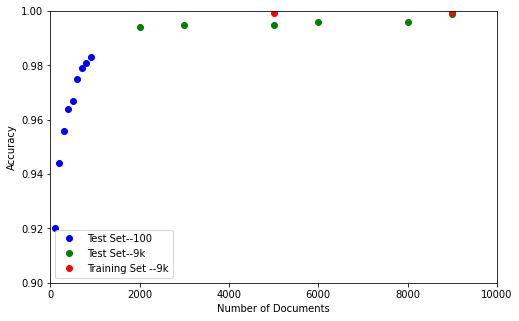

In [41]:
import matplotlib.pyplot as plt
#TODO add training perf
#plt.plot(test_doc_count, test_perf, 'ro')
# manual plotting on large dataset 5000-9000 that takes more resource and time to run
plt.figure(figsize=(8,5))
plt.plot([100,200,300,400,500,600,700,800,900],[0.920,0.944,0.956,0.964,0.967,0.975,0.979,0.981,0.983], 'bo')
plt.plot([2000,3000,5000,6000,8000,9000], [0.994,0.995,0.995,0.996,0.996,0.999], 'go')
plt.plot([5000,9000], [0.9994,0.9998], 'ro')

plt.axis([0, 10000, 0.90, 1.00])
plt.ylabel('Accuracy')
plt.xlabel('Number of Documents')
plt.legend(["Test Set--100",'Test Set--9k', 'Training Set --9k'], loc='best')
plt.show()

**Predict the test set and look at performance**

In [42]:
import pickle
#filename = 'sklearn_crf_model_100-100i.sav'
#filename = 'sklearn_crf_model_9k-50i.sav'
#filename = 'sklearn_crf_model_100-100i.sav'
filename = 'sklearn_crf_model_10k-100i.sav'

# save model to disk for further run
pickle.dump(crf, open(filename, 'wb'))
print("File:", filename)

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print("Train set num sentences:", len(y_train))
print("Performance on training set:", result)

result = loaded_model.score(X_test, y_test)
print("Test set num sentences:", len(y_test))
print("Performance on test set:", result)


#y_predict = loaded_model.predict(X_test)
#print("x_test[0]", X_test[0])
#print("y_predict[0]", y_predict[0])

#File: sklearn_crf_model_100-100i.sav --optimized param
#Performance on training set: 0.9997040369361904
#Performance on test set: 0.9783544382758406
#NOTE perf is lower 0.9819 

#File: sklearn_crf_model_100-100i.sav -- with text corrections
#Performance on training set: 0.9996959978111842
#Performance on test set: 0.979850704383454

#File: sklearn_crf_model_8k-50i.sav -- 08-05-2019
#Performance on training set: 0.9992224760896037
#Performance on test set: 0.9961086516225393

#With new 10K docs -- full 10k training on 20% test split 10/22/2019
#Train set num sentences: 58324
#Performance on training set: 0.9997693866559333
#Test set num sentences: 14581
#Performance on test set: 0.9974465107523913

#File: sklearn_crf_model_100-100i.sav -- old c1,c2
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.982883439025759

#File: sklearn_crf_model_100-100i.sav
#Train set num sentences: 696
#Performance on training set: 0.9999144212430926
#Test set num sentences: 175
#Performance on test set: 0.9839497165946461

File: sklearn_crf_model_10k-100i.sav
Train set num sentences: 6737
Performance on training set: 0.9998972891570622
Test set num sentences: 1685
Performance on test set: 0.994810298183903


In [43]:
t = "ចំណែកជើងទី២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
pred = loaded_model.predict([features])
print("features:", features[0:2])
print("\npredict seg:", pred )

separator = "-"
tkcc = []
for k in features:
  tkcc.append(k['kcc'])
print("kcc:", tkcc)
complete = ""
for i, p in enumerate(pred[0]):
    if p == "1":
      complete += separator + tkcc[i]
    else:
      complete += tkcc[i]
complete = complete.strip(separator)
complete = complete.replace(separator+" "+separator, " ")
print("segment:", complete)
print("correct:", t_correct)

len kcc: 22 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២', ' ', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}]

predict seg: [['1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1']]
kcc: ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', '

In [44]:
# output predicted -- give a string to be split by newline and sentences
def segment_text(str, spacer=" "):
  complete = ""
  for sen in str.split('\n'):
    if sen.strip() == "": continue
    sen = sen.replace(u'\u200b','')
    kccs = seg_kcc(sen)
    features=create_kcc_features(kccs)
    # predicts take list of sentences features
    prediction = crf.predict([features])
  
    #print("-len kccs:", len(kccs), " data 13:", kccs[:13])
    #print("-len feature:", len(features), " data 3:", features[:3])
    #print("-len prediction:", len(prediction), "data[0]:", prediction[0])

    for i, p in enumerate(prediction[0]):
        if p == "1":
            complete += spacer + kccs[i]
        else:
            complete += kccs[i]
    complete += "\n"
  complete = complete.replace(spacer+" ", " ").replace(" "+spacer, " ") # no 200b before or after space
  return complete[:-1]

print("seg:", segment_text("ចំណែកជើងទី២ \n\n\nនឹងត្រូវធ្វើឡើង\n\nឯប្រទេសកាតា៕"))

seg:  ចំណែក ជើង ទី២ 
 នឹង ត្រូវ ធ្វើឡើង
 ឯ ប្រទេស កាតា ៕


In [45]:
t_orig = """សេតវិមាន​ទាត់ចោល​កិច្ចសហការ​ក្នុង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លើ​លោក​ត្រាំ

​សេតវិមាន​ដ៏​រឹងរូស​បាន​ប្រកាស​សង្គ្រាម​កាលពី​ថ្ងៃអង្គារ​ទី ៨ តុលា​ប្រឆាំង​នឹង​ការស៊ើបអង្កេត​ដើម្បី​ចោទប្រកាន់​លោក​ដូណាល់ ​ត្រាំ ​ដោយ​ពន្លះ​ដំណើរការ​នេះ​ថា​ ​បក្សពួក​និយម ​ខុស​ច្បាប់​ ​និង​ ​ផ្ទុយ​រដ្ឋធម្មនុញ្ញ ​ហើយ​និយាយ​ថា​ទាំង​ប្រធានាធិបតី​និង​រដ្ឋបាល​របស់​គាត់​នឹង​មិន​សហការ​ទេ​នៅក្នុង​លិខិត​ពោរពេញ​ដោយ​កំហឹង​ ​សេតវិមាន​បាន​វាយ​សំពង​ទៅលើ​ប្រធាន​សភា​លោកស្រី​ណាន់​ស៊ី ​ផេឡូស៊ី ​និង​ ​ប្រធាន​គណៈកម្មាធិការ​សភា​ចំនួន​ ៣ ​ដែល​ដឹកនាំ​ការស៊ើបអង្កេត​នេះ​ ​ដោយ​ជំរុញ​ពួកគេ​ឱ្យ​បន្ត​ប្រឹងប្រែង​បណ្តេញ​លោក​ត្រាំតទៅទៀត​ចុះ​ ​ទោះបី​គ្មាន​កិច្ចសហប្រតិបត្តិការ​នា​ពេល​អនាគត​ក៏ដោយ​។

​ទីប្រឹក្សា​សេតវិមាន​លោក​ផាត់ ​ស៊ី​បូល​ឡូន ​បាន​សរសេរ​នៅក្នុង​លិខិត​កម្រាស់​ ៨ ​ទំព័រ​ថា​ “​និយាយ​ឱ្យ​ចំ​ទៅ​ ​អ្នក​កំពុង​ស្វះស្វែង​បដិសេធ​លទ្ធផល​នៃ​ការបោះឆ្នោត​ឆ្នាំ​ ២០១៦ ​និង​ដកហូត​សិទ្ធិ​របស់​ពលរដ្ឋ​អាម៉េរិក​ក្នុង​ការបោះឆ្នោត​ជ្រើសរើស​ប្រធានាធិបតី​ដោយ​សេរី​”​។

​ទាក់ទិន​នឹង​ការស៊ើបអង្កេត​ដែល​កំពុង​ធ្វើឡើង​ដើម្បី​រកមើល​ថា​តើ​លោក​ត្រាំ​បាន​រំលោភ​ការិយាល័យ​របស់​លោក​ដោយ​ស្វែងរក​ការស៊ើបអង្កេត​អំពី​អំពើពុករលួយ​នៅ​អ៊ុយក្រែន​លើ​គូ​ប្រជែង​របស់​លោក​គឺ​លោក​ ​ចូ ​បាយ​ដិន ​ឬ​អត់​នោះ​ លោក​ស៊ីបូល​ឡូន​និយាយ​ថា​ “​ការស៊ើបអង្កេត​របស់​អ្នកឯង​ខ្វះ​មូលដ្ឋាន​រដ្ឋធម្មនុញ្ញ​ស្រប​ច្បាប់​ ​ខ្វះ​អំណះអំណាង​យុត្តិធម៌​ ​និង​សូម្បី​ខ្វះ​នូវ​ភស្តុតាង​គោលបំផុត​ក្នុង​ដំណើរការ​ស៊ើបអង្កេត​នេះ​។

 ​ប្រធានាធិបតី​ត្រាំ​មិន​អាច​អនុញ្ញាតឱ្យ​រដ្ឋបាល​គាត់​ចូលរួម​ក្នុង​ការស៊ើបអង្កេត​ប្រកាន់​បក្ខពួក​នេះ​នៅក្រោម​កាលៈទេសៈ​ដូច្នេះ​ទេ​”​។

 ​លោកស្រី​ផេឡូស៊ី​បាន​វាយ​បក​វិញ​ ​ដោយ​ហៅ​លិខិត​នោះ​ថា​ “​ខុស​ទាំង​ដុល​” ​និង​ពណ៌នាវា​ថា​ជា​ “​ការប៉ុនប៉ង​ខុស​ច្បាប់​មួយ​ទៀត​ដើម្បី​លាក់បាំង​ការពិត​”​។

 ​លោកស្រី​និយាយ​ថា​ ​“​ប្រធានាធិបតី​ត្រាំ ​លោក​ឯង​មិន​អាច​នៅ​ពីលើ​ច្បាប់​បាន​ទេ​។

 ​លោក​ឯង​នឹង​ត្រូវ​ចាប់​ឱ្យ​ទទួលខុសត្រូវ​”​។

 ​លោកស្រី​បាន​ព្រមាន​ថា​ “​ការបន្ត​ប្រឹងប្រែង​លាក់បាំង​ការពិត​នៃ​ការរំលោភ​អំណាច​របស់​ប្រធានាធិបតី​ពី​ប្រជាជន​នឹង​ត្រូវ​ចាត់ទុក​ជា​ភស្តុតាង​បន្ថែម​ទៀត​នៃ​ការធ្វើឱ្យ​ស្ទះ​ដល់​ការអនុវត្ត​ច្បាប់​”​៕

 ​ដោយ​៖​ ​កញ្ញា​ដាលី​ស"""
t=t_orig.replace("\u200b","")
seg = segment_text(t,"\u2022")
print("seg:", seg.replace("  "," "))
print("orig:", t_orig.replace("\u200b", "\u2022").replace("\n\n","\n"))

seg: •សេតវិមាន•ទាត់•ចោល•កិច្ចសហការ•ក្នុង•ការស៊ើបអង្កេត•ដើម្បី•ចោទប្រកាន់•លើ•លោក•ត្រាំ
•សេតវិមាន•ដ៏•រឹង•រូស•បាន•ប្រកាស•សង្គ្រាម•កាលពី•ថ្ងៃអង្គារ•ទី ៨ តុលា•ប្រឆាំង•នឹង•ការស៊ើបអង្កេត•ដើម្បី•ចោទប្រកាន់•លោក•ដូណាល់ ត្រាំ ដោយ•ពន្លះ•ដំណើរការ•នេះ•ថា បក្សពួក•និយម ខុស•ច្បាប់ និង ផ្ទុយ•រដ្ឋធម្មនុញ្ញ ហើយនិយាយ•ថា•ទាំង•ប្រធានាធិបតី•និង•រដ្ឋបាល•របស់•គាត់•នឹង•មិន•សហការ•ទេ•នៅក្នុង•លិខិត•ពោរពេញ•ដោយ•កំហឹង សេតវិមាន•បាន•វាយ•សំពង•ទៅលើ•ប្រធាន•សភា•លោកស្រី•ណាន់•ស៊ី ផេឡូស៊ី និង ប្រធាន•គណៈកម្មាធិការ•សភា•ចំនួន ៣ ដែល•ដឹកនាំ•ការស៊ើបអង្កេត•នេះ ដោយ•ជំរុញ•ពួកគេ•ឱ្យ•បន្ត•ប្រឹងប្រែង•បណ្តេញ•លោក•ត្រាំ•តទៅទៀត•ចុះ ទោះបី•គ្មាន•កិច្ចសហប្រតិបត្តិការ•នា•ពេល•អនាគត•ក៏ដោយ•។
•ទីប្រឹក្សា•សេតវិមាន•លោក•ផាត់ ស៊ីបូល•ឡូន បាន•សរសេរ•នៅក្នុង•លិខិត•កម្រាស់ ៨ ទំព័រ•ថា “•និយាយ•ឱ្យ•ចំទៅ អ្នក•កំពុង•ស្វះស្វែង•បដិសេធ•លទ្ធផល•នៃ•ការបោះឆ្នោត•ឆ្នាំ ២០១៦ និង•ដកហូត•សិទ្ធិ•របស់•ពលរដ្ឋ•អាម៉េរិក•ក្នុង•ការបោះឆ្នោត•ជ្រើសរើស•ប្រធានាធិបតី•ដោយ•សេរី•”•។
•ទាក់ទិន•នឹង•ការស៊ើបអង្កេត•ដែល•កំពុង•ធ្វើឡើង•ដើម្បី•រកមើល•ថា•តើ•លោក•ត្រាំ•បាន•រំលោភ•ការិយាល័យ•របស់•លោក•ដោយ•ស្វែ

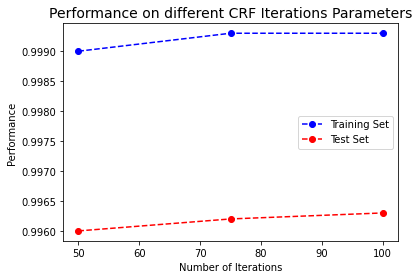

In [46]:
# Performance with different iteration number on 9K articles count
from matplotlib.pylab import plt #load plot library
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot([50,75,100], [0.9990,0.9993,0.9993], "--b",marker='o', label="Training Set")
plt.plot([50,75,100], [0.9960,0.9962,0.9963], "--r",marker='o', label="Test Set")
plt.ylabel('Performance')
plt.xlabel('Number of Iterations')
plt.legend(["Training Set",'Test Set'], loc='best')
plt.title("Performance on different CRF Iterations Parameters", fontsize=14)
plt.show()


In [47]:
print("Used seg_text:", len(seg_text))
print("total data:", len(X), len(y))
print("number of sentences:", len(sentences))
!ls -alh *model*

# Look at the model output size per number of document (iteration affect the size)
#-rw-r--r-- 1 root root 126M Jul 22 00:23 sklearn_crf_model_9k-50i.sav
#-rw-r--r-- 1 root root  52M Jul 21 23:51 sklearn_crf_model_9k-75i.sav
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
# Doc size obviously affect the model size
#-rw-r--r-- 1 root root  41M Jul 22 01:16 sklearn_crf_model_9k-100i.sav
#-rw-r--r-- 1 root root  23M Jul 23 04:10 sklearn_crf_model_5k-100i.sav
#-rw-r--r-- 1 root root 2.7M Jul 22 19:54 sklearn_crf_model_100-100i.sav


Used seg_text: 1000
total data: 8422 8422
number of sentences: 8422
-rw-r--r-- 1 root root 7.9M Sep  1 06:54 crf.model
-rw-r--r-- 1 root root 4.8M Sep  1 06:54 sklearn_crf_model_10k-100i.sav


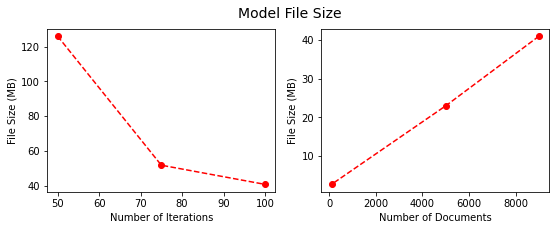

In [48]:
#@title Model File Size Chart
%matplotlib inline
iterations = [50,75,100]
iteration_fsize = [126,52,41]
doc_sizes = [9000,5000,100]
doc_fsizes = [41,23,2.7]
fig, axs = plt.subplots(1, 2, figsize=(9, 3))

axs[0].plot(iterations, iteration_fsize, "--r",marker='o')
axs[0].set_xlabel('Number of Iterations')
axs[0].set_ylabel('File Size (MB)')
axs[1].plot(doc_sizes, doc_fsizes, "--r",marker='o')
axs[1].set_ylabel('File Size (MB)')
axs[1].set_xlabel('Number of Documents')
fig.suptitle('Model File Size', fontsize=14)
plt.show()


# **Hyper parameter tuning**
**Randomized Search**

In [49]:
%%time
# use RandomizedSearch with F1 score
#import nltk
#import sklearn
import scipy.stats

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics

# define fixed parameters and parameters to search

def run_randomize_search():
  crf = sklearn_crfsuite.CRF(
      algorithm='lbfgs',
      max_iterations=100,
      all_possible_transitions=True
  )
  params_space = {
      'c1': scipy.stats.expon(scale=0.5),
      'c2': scipy.stats.expon(scale=0.05),
  }

  #clabels = list(crf.classes_)
  clabels = ['1', '0']

  # use the same metric for evaluation
  f1_scorer = make_scorer(metrics.flat_f1_score,
                          average='weighted', labels=clabels)

  # search
  rs = RandomizedSearchCV(crf, params_space,
                          cv=3,
                          verbose=1,
                          n_jobs=-1,
                          n_iter=50,
                          scoring=f1_scorer)
  rs.fit(X_train, y_train)
  return rs

# Fitting 3 folds for each of 50 candidates, totalling 150 fits
# [Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
# [Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
# [Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 32.0min finished
# CPU times: user 31min 42s, sys: 17.5 s, total: 32min
# Wall time: 32min 16s



CPU times: user 45 µs, sys: 1 µs, total: 46 µs
Wall time: 49.1 µs


In [50]:
#uncomment me to run randomize search
#rs=run_randomize_search()

#crf = rs.best_estimator_

In [51]:
"""
#uncomment me to run randomize search
#rs=run_randomize_search()

#crf = rs.best_estimator_
print('best params:', rs.best_params_)
print('best CV score:', rs.best_score_)
print('model size: {:0.2f}M'.format(rs.best_estimator_.size_ / 1000000))

import pandas as pd
#print('grid score:', rs.cv_results_) not important
dfrs = pd.DataFrame(rs.cv_results_)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs["param_c2"] = dfrs["param_c2"].astype(float)
dfrs.drop("params", axis=1, inplace=True)

print(dfrs.head())
print(dfrs.info())

# for p in dfrs["param_c1"]:
#   print ("P:",p, type(p))

# for s in rs.cv_results_.keys():
#   print('rs cv_results key:', s)
#   print('rs cv_results:', rs.cv_results_[s])
  
#best params: {'c1': 0.13787813729888343, 'c2': 0.01439440358969233}
#best CV score: 0.971210607745938
#model size: 1.73M
# 50 plot 
#best params: {'c1': 0.014907906173550766, 'c2': 0.0037402642391942613}
#best CV score: 0.9699000433318031
#model size: 3.08M

# 100_200b model - 10/27/2019
#best params: {'c1': 0.04179350773216069, 'c2': 0.0005561313093527635}
#best CV score: 0.9789616724105187
#model size: 1.63M

"""

'\n#uncomment me to run randomize search\n#rs=run_randomize_search()\n\n#crf = rs.best_estimator_\nprint(\'best params:\', rs.best_params_)\nprint(\'best CV score:\', rs.best_score_)\nprint(\'model size: {:0.2f}M\'.format(rs.best_estimator_.size_ / 1000000))\n\nimport pandas as pd\n#print(\'grid score:\', rs.cv_results_) not important\ndfrs = pd.DataFrame(rs.cv_results_)\ndfrs["param_c2"] = dfrs["param_c2"].astype(float)\ndfrs["param_c2"] = dfrs["param_c2"].astype(float)\ndfrs.drop("params", axis=1, inplace=True)\n\nprint(dfrs.head())\nprint(dfrs.info())\n\n# for p in dfrs["param_c1"]:\n#   print ("P:",p, type(p))\n\n# for s in rs.cv_results_.keys():\n#   print(\'rs cv_results key:\', s)\n#   print(\'rs cv_results:\', rs.cv_results_[s])\n  \n#best params: {\'c1\': 0.13787813729888343, \'c2\': 0.01439440358969233}\n#best CV score: 0.971210607745938\n#model size: 1.73M\n# 50 plot \n#best params: {\'c1\': 0.014907906173550766, \'c2\': 0.0037402642391942613}\n#best CV score: 0.969900043331

In [52]:
"""
%matplotlib inline
import matplotlib.pyplot as plt

_x = dfrs["param_c1"] #[s.parameters['c1'] for s in rs.cv_results_]
_y = dfrs["param_c2"] #[s.parameters['c2'] for s in rs.cv_results_]
_c = dfrs["mean_test_score"] #[s.mean_validation_score for s in rs.cv_results_]

fig = plt.figure()
fig.set_size_inches(12, 12)
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(
    min(_c), max(_c)
))

#ax.legend("o", _c)
ax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])

print("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))
"""

'\n%matplotlib inline\nimport matplotlib.pyplot as plt\n\n_x = dfrs["param_c1"] #[s.parameters[\'c1\'] for s in rs.cv_results_]\n_y = dfrs["param_c2"] #[s.parameters[\'c2\'] for s in rs.cv_results_]\n_c = dfrs["mean_test_score"] #[s.mean_validation_score for s in rs.cv_results_]\n\nfig = plt.figure()\nfig.set_size_inches(12, 12)\nax = plt.gca()\nax.set_yscale(\'log\')\nax.set_xscale(\'log\')\nax.set_xlabel(\'C1\')\nax.set_ylabel(\'C2\')\nax.set_title("Randomized Hyperparameter Search CV Results (min={:0.3}, max={:0.3})".format(\n    min(_c), max(_c)\n))\n\n#ax.legend("o", _c)\nax.scatter(_x, _y, c=_c, s=60, alpha=0.9, edgecolors=[0,0,0])\n\nprint("Dark blue => {:0.4}, dark red => {:0.4}".format(min(_c), max(_c)))\n'

**grid_search**

In [53]:
# setup grid search method
from sklearn.model_selection import GridSearchCV
from time import time
def run_grid_search():
  parameters = {
      'c1': [0.001, 0.01, 0.1],
      'c2': [0.001, 0.01, 0.1],
  }
  # run grid search
  grid_search = GridSearchCV(crf, param_grid=parameters, cv=3, iid=False)
  start = time()
  grid_search.fit(X, y)

  print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
        % (time() - start, len(grid_search.cv_results_['params'])))
  return grid_search

In [54]:
# grid search results
import numpy as np
#grid_search.cv_results_
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# uncomment me out to run grid search
gs = run_grid_search()            
report(gs.cv_results_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:25<00:00, 224.11it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.573

L-BFGS optimization
c1: 0.001000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.46  loss=296622.13 active=1186934 feature_norm=1.00
Iter 2   time=0.72  loss=265767.07 active=1211234 feature_norm=1.82
Iter 3   time=0.71  loss=246474.11 active=1208312 feature_norm=1.92
Iter 4   time=0.72  loss=228106.65 active=1208116 feature_norm=2.31
Iter 5   time=0.71  loss=215787.88 active=1210518 feature_norm=2.79
Iter 6   time=0.75  loss=191227.31 active=1203778 feature_norm=4.39
Iter 7   time=0.74  loss=179969.16 active=1210258 feature_norm=5.31
Iter 8   time=0.73  loss=166302.82 active=1210930 feature_norm=6.25
Iter 9   time=0.73  loss=137463.35 active=1207644 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 196.77it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.428

L-BFGS optimization
c1: 0.001000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.35  loss=290401.18 active=1201366 feature_norm=1.00
Iter 2   time=0.69  loss=264979.70 active=1225686 feature_norm=1.86
Iter 3   time=0.71  loss=242520.77 active=1223010 feature_norm=1.97
Iter 4   time=0.70  loss=226427.70 active=1223484 feature_norm=2.31
Iter 5   time=0.72  loss=215003.21 active=1225768 feature_norm=2.74
Iter 6   time=0.74  loss=191118.69 active=1219074 feature_norm=4.24
Iter 7   time=0.79  loss=177771.33 active=1224648 feature_norm=5.21
Iter 8   time=0.74  loss=163291.84 active=1225516 feature_norm=6.31
Iter 9   time=0.75  loss=140429.21 active=1224080 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 196.49it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.490

L-BFGS optimization
c1: 0.001000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.39  loss=297102.41 active=1203149 feature_norm=1.00
Iter 2   time=0.72  loss=268653.16 active=1228207 feature_norm=1.85
Iter 3   time=0.77  loss=247188.04 active=1225165 feature_norm=1.96
Iter 4   time=0.76  loss=229938.17 active=1225593 feature_norm=2.32
Iter 5   time=0.73  loss=217946.05 active=1227801 feature_norm=2.77
Iter 6   time=0.73  loss=193356.72 active=1221341 feature_norm=4.29
Iter 7   time=0.73  loss=180136.84 active=1227131 feature_norm=5.36
Iter 8   time=0.72  loss=166803.89 active=1228067 feature_norm=6.30
Iter 9   time=0.72  loss=143781.47 active=1226669 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:27<00:00, 201.70it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.467

L-BFGS optimization
c1: 0.001000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.38  loss=296622.14 active=1186934 feature_norm=1.00
Iter 2   time=0.71  loss=265767.10 active=1211234 feature_norm=1.82
Iter 3   time=0.69  loss=246474.15 active=1208312 feature_norm=1.92
Iter 4   time=0.70  loss=228106.72 active=1208116 feature_norm=2.31
Iter 5   time=0.70  loss=215787.98 active=1210518 feature_norm=2.79
Iter 6   time=0.72  loss=191227.53 active=1203778 feature_norm=4.39
Iter 7   time=0.74  loss=179969.48 active=1210258 feature_norm=5.31
Iter 8   time=0.73  loss=166303.33 active=1210930 feature_norm=6.25
Iter 9   time=0.76  loss=137464.51 active=1207644 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 196.72it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.560

L-BFGS optimization
c1: 0.001000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.35  loss=290401.19 active=1201366 feature_norm=1.00
Iter 2   time=0.69  loss=264979.73 active=1225686 feature_norm=1.86
Iter 3   time=0.73  loss=242520.81 active=1223010 feature_norm=1.97
Iter 4   time=0.71  loss=226427.77 active=1223484 feature_norm=2.31
Iter 5   time=0.71  loss=215003.31 active=1225768 feature_norm=2.74
Iter 6   time=0.74  loss=191118.89 active=1219074 feature_norm=4.24
Iter 7   time=0.74  loss=177771.64 active=1224648 feature_norm=5.21
Iter 8   time=0.71  loss=163292.37 active=1225516 feature_norm=6.31
Iter 9   time=0.74  loss=140430.25 active=1224080 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 193.97it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.520

L-BFGS optimization
c1: 0.001000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.46  loss=297102.42 active=1203149 feature_norm=1.00
Iter 2   time=0.74  loss=268653.19 active=1228207 feature_norm=1.85
Iter 3   time=0.71  loss=247188.08 active=1225165 feature_norm=1.96
Iter 4   time=0.73  loss=229938.24 active=1225593 feature_norm=2.32
Iter 5   time=0.73  loss=217946.15 active=1227801 feature_norm=2.77
Iter 6   time=0.74  loss=193356.93 active=1221341 feature_norm=4.29
Iter 7   time=0.74  loss=180137.17 active=1227131 feature_norm=5.36
Iter 8   time=0.77  loss=166804.43 active=1228067 feature_norm=6.30
Iter 9   time=0.77  loss=143782.48 active=1226669 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:28<00:00, 199.00it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.524

L-BFGS optimization
c1: 0.001000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.39  loss=296622.23 active=1186934 feature_norm=1.00
Iter 2   time=0.71  loss=265767.39 active=1211234 feature_norm=1.82
Iter 3   time=0.73  loss=246474.55 active=1208312 feature_norm=1.92
Iter 4   time=0.74  loss=228107.45 active=1208116 feature_norm=2.31
Iter 5   time=0.75  loss=215789.05 active=1210518 feature_norm=2.79
Iter 6   time=0.78  loss=191229.67 active=1203778 feature_norm=4.39
Iter 7   time=0.80  loss=179972.60 active=1210258 feature_norm=5.31
Iter 8   time=0.79  loss=166308.42 active=1210930 feature_norm=6.25
Iter 9   time=0.78  loss=137476.02 active=1207644 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 197.70it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.457

L-BFGS optimization
c1: 0.001000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.33  loss=290401.28 active=1201366 feature_norm=1.00
Iter 2   time=0.68  loss=264980.02 active=1225686 feature_norm=1.86
Iter 3   time=0.71  loss=242521.23 active=1223010 feature_norm=1.97
Iter 4   time=0.69  loss=226428.47 active=1223484 feature_norm=2.31
Iter 5   time=0.73  loss=215004.31 active=1225768 feature_norm=2.74
Iter 6   time=0.73  loss=191120.90 active=1219074 feature_norm=4.24
Iter 7   time=0.74  loss=177774.77 active=1224648 feature_norm=5.21
Iter 8   time=0.74  loss=163297.65 active=1225516 feature_norm=6.31
Iter 9   time=0.77  loss=140440.65 active=1224080 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:29<00:00, 193.43it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.517

L-BFGS optimization
c1: 0.001000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.39  loss=297102.51 active=1203149 feature_norm=1.00
Iter 2   time=0.70  loss=268653.49 active=1228207 feature_norm=1.85
Iter 3   time=0.69  loss=247188.49 active=1225165 feature_norm=1.96
Iter 4   time=0.72  loss=229938.96 active=1225593 feature_norm=2.32
Iter 5   time=0.74  loss=217947.19 active=1227801 feature_norm=2.77
Iter 6   time=0.72  loss=193359.03 active=1221341 feature_norm=4.29
Iter 7   time=0.74  loss=180140.50 active=1227131 feature_norm=5.36
Iter 8   time=0.73  loss=166809.80 active=1228067 feature_norm=6.30
Iter 9   time=0.74  loss=143792.59 active=1226669 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:28<00:00, 194.52it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.513

L-BFGS optimization
c1: 0.010000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.43  loss=296622.52 active=1186934 feature_norm=1.00
Iter 2   time=0.76  loss=265767.93 active=1210738 feature_norm=1.82
Iter 3   time=0.80  loss=246475.27 active=1208266 feature_norm=1.92
Iter 4   time=0.76  loss=228108.54 active=1207998 feature_norm=2.31
Iter 5   time=0.76  loss=215790.49 active=1210324 feature_norm=2.79
Iter 6   time=0.78  loss=191232.31 active=1203450 feature_norm=4.39
Iter 7   time=0.76  loss=179976.00 active=1209938 feature_norm=5.31
Iter 8   time=0.75  loss=166313.37 active=1210712 feature_norm=6.25
Iter 9   time=0.76  loss=137483.79 active=1207182 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:28<00:00, 198.58it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.447

L-BFGS optimization
c1: 0.010000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.35  loss=290401.56 active=1201366 feature_norm=1.00
Iter 2   time=0.71  loss=264980.54 active=1225048 feature_norm=1.86
Iter 3   time=0.71  loss=242521.93 active=1223104 feature_norm=1.97
Iter 4   time=0.72  loss=226429.50 active=1223358 feature_norm=2.31
Iter 5   time=0.72  loss=215005.64 active=1225658 feature_norm=2.74
Iter 6   time=0.74  loss=191123.33 active=1218776 feature_norm=4.24
Iter 7   time=0.74  loss=177778.15 active=1224452 feature_norm=5.21
Iter 8   time=0.73  loss=163302.65 active=1225240 feature_norm=6.31
Iter 9   time=0.75  loss=140447.48 active=1223762 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:30<00:00, 186.84it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.559

L-BFGS optimization
c1: 0.010000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.43  loss=297102.80 active=1203149 feature_norm=1.00
Iter 2   time=0.78  loss=268654.01 active=1227619 feature_norm=1.85
Iter 3   time=0.79  loss=247189.20 active=1225171 feature_norm=1.96
Iter 4   time=0.80  loss=229940.01 active=1225445 feature_norm=2.32
Iter 5   time=0.77  loss=217948.57 active=1227699 feature_norm=2.77
Iter 6   time=0.76  loss=193361.54 active=1221047 feature_norm=4.29
Iter 7   time=0.75  loss=180143.75 active=1226877 feature_norm=5.36
Iter 8   time=0.75  loss=166814.33 active=1227859 feature_norm=6.30
Iter 9   time=0.75  loss=143798.98 active=1226335 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:30<00:00, 184.07it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.549

L-BFGS optimization
c1: 0.010000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.52  loss=296622.53 active=1186934 feature_norm=1.00
Iter 2   time=0.80  loss=265767.95 active=1210738 feature_norm=1.82
Iter 3   time=0.80  loss=246475.31 active=1208266 feature_norm=1.92
Iter 4   time=0.78  loss=228108.62 active=1207998 feature_norm=2.31
Iter 5   time=0.82  loss=215790.60 active=1210324 feature_norm=2.79
Iter 6   time=0.84  loss=191232.53 active=1203450 feature_norm=4.39
Iter 7   time=0.84  loss=179976.31 active=1209938 feature_norm=5.31
Iter 8   time=0.83  loss=166313.88 active=1210712 feature_norm=6.25
Iter 9   time=0.82  loss=137484.94 active=1207182 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:31<00:00, 179.80it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.677

L-BFGS optimization
c1: 0.010000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.54  loss=290401.57 active=1201366 feature_norm=1.00
Iter 2   time=0.77  loss=264980.57 active=1225048 feature_norm=1.86
Iter 3   time=0.78  loss=242521.97 active=1223104 feature_norm=1.97
Iter 4   time=0.81  loss=226429.57 active=1223358 feature_norm=2.31
Iter 5   time=0.81  loss=215005.74 active=1225658 feature_norm=2.74
Iter 6   time=0.83  loss=191123.53 active=1218776 feature_norm=4.24
Iter 7   time=0.84  loss=177778.46 active=1224452 feature_norm=5.21
Iter 8   time=0.84  loss=163303.18 active=1225240 feature_norm=6.31
Iter 9   time=0.84  loss=140448.51 active=1223762 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:37<00:00, 151.12it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 5.025

L-BFGS optimization
c1: 0.010000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.96  loss=297102.81 active=1203149 feature_norm=1.00
Iter 2   time=1.00  loss=268654.04 active=1227619 feature_norm=1.85
Iter 3   time=1.10  loss=247189.24 active=1225171 feature_norm=1.96
Iter 4   time=1.05  loss=229940.08 active=1225445 feature_norm=2.32
Iter 5   time=1.08  loss=217948.67 active=1227699 feature_norm=2.77
Iter 6   time=1.17  loss=193361.75 active=1221047 feature_norm=4.29
Iter 7   time=1.09  loss=180144.08 active=1226877 feature_norm=5.36
Iter 8   time=1.08  loss=166814.87 active=1227859 feature_norm=6.30
Iter 9   time=1.07  loss=143799.99 active=1226335 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:35<00:00, 158.32it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 5.063

L-BFGS optimization
c1: 0.010000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=2.05  loss=296622.62 active=1186934 feature_norm=1.00
Iter 2   time=1.05  loss=265768.24 active=1210738 feature_norm=1.82
Iter 3   time=1.03  loss=246475.70 active=1208266 feature_norm=1.92
Iter 4   time=1.06  loss=228109.34 active=1207998 feature_norm=2.31
Iter 5   time=1.04  loss=215791.67 active=1210324 feature_norm=2.79
Iter 6   time=1.05  loss=191234.67 active=1203450 feature_norm=4.39
Iter 7   time=1.10  loss=179979.45 active=1209938 feature_norm=5.31
Iter 8   time=1.10  loss=166318.98 active=1210712 feature_norm=6.25
Iter 9   time=1.08  loss=137496.45 active=1207182 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:33<00:00, 167.10it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.608

L-BFGS optimization
c1: 0.010000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.52  loss=290401.66 active=1201366 feature_norm=1.00
Iter 2   time=0.77  loss=264980.86 active=1225048 feature_norm=1.86
Iter 3   time=0.77  loss=242522.39 active=1223104 feature_norm=1.97
Iter 4   time=0.76  loss=226430.27 active=1223358 feature_norm=2.31
Iter 5   time=0.77  loss=215006.74 active=1225658 feature_norm=2.74
Iter 6   time=0.80  loss=191125.54 active=1218778 feature_norm=4.24
Iter 7   time=0.80  loss=177781.59 active=1224450 feature_norm=5.21
Iter 8   time=0.80  loss=163308.46 active=1225240 feature_norm=6.31
Iter 9   time=0.79  loss=140458.90 active=1223762 fea

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:30<00:00, 182.40it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.578

L-BFGS optimization
c1: 0.010000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.46  loss=297102.90 active=1203149 feature_norm=1.00
Iter 2   time=0.78  loss=268654.33 active=1227619 feature_norm=1.85
Iter 3   time=0.77  loss=247189.65 active=1225171 feature_norm=1.96
Iter 4   time=0.76  loss=229940.80 active=1225445 feature_norm=2.32
Iter 5   time=0.75  loss=217949.72 active=1227699 feature_norm=2.77
Iter 6   time=0.78  loss=193363.85 active=1221047 feature_norm=4.29
Iter 7   time=0.78  loss=180147.41 active=1226873 feature_norm=5.36
Iter 8   time=0.82  loss=166820.24 active=1227859 feature_norm=6.30
Iter 9   time=0.81  loss=143810.09 active=1226335 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:29<00:00, 187.81it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.528

L-BFGS optimization
c1: 0.100000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.47  loss=296626.45 active=1186934 feature_norm=1.00
Iter 2   time=0.74  loss=265776.16 active=1205230 feature_norm=1.82
Iter 3   time=0.75  loss=246486.47 active=1207448 feature_norm=1.92
Iter 4   time=0.77  loss=228126.93 active=1205850 feature_norm=2.31
Iter 5   time=0.79  loss=215815.90 active=1207464 feature_norm=2.79
Iter 6   time=0.78  loss=191280.79 active=1188315 feature_norm=4.39
Iter 7   time=0.80  loss=180042.00 active=1090547 feature_norm=5.30
Iter 8   time=0.80  loss=166415.25 active=1041725 feature_norm=6.25
Iter 9   time=0.79  loss=137679.36 active=978457 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:31<00:00, 179.77it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.577

L-BFGS optimization
c1: 0.100000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.50  loss=290405.36 active=1201366 feature_norm=1.00
Iter 2   time=0.76  loss=264988.83 active=1218762 feature_norm=1.86
Iter 3   time=0.77  loss=242533.34 active=1222548 feature_norm=1.97
Iter 4   time=0.78  loss=226447.16 active=1221430 feature_norm=2.31
Iter 5   time=0.80  loss=215029.47 active=1222996 feature_norm=2.74
Iter 6   time=0.81  loss=191168.74 active=1207510 feature_norm=4.24
Iter 7   time=0.88  loss=177844.68 active=1096421 feature_norm=5.21
Iter 8   time=0.83  loss=163408.13 active=1047455 feature_norm=6.30
Iter 9   time=0.85  loss=140625.91 active=992105 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:31<00:00, 176.07it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.653

L-BFGS optimization
c1: 0.100000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.55  loss=297106.68 active=1203149 feature_norm=1.00
Iter 2   time=0.77  loss=268664.52 active=1221583 feature_norm=1.85
Iter 3   time=0.80  loss=247201.78 active=1224715 feature_norm=1.96
Iter 4   time=0.81  loss=229969.55 active=1223101 feature_norm=2.32
Iter 5   time=0.82  loss=218000.55 active=1224931 feature_norm=2.77
Iter 6   time=0.81  loss=193426.04 active=1208800 feature_norm=4.29
Iter 7   time=0.84  loss=180222.45 active=1107426 feature_norm=5.36
Iter 8   time=0.89  loss=166902.17 active=1058021 feature_norm=6.30
Iter 9   time=0.90  loss=143930.81 active=1004897 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:30<00:00, 182.97it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.562

L-BFGS optimization
c1: 0.100000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.51  loss=296626.46 active=1186934 feature_norm=1.00
Iter 2   time=0.78  loss=265776.19 active=1205230 feature_norm=1.82
Iter 3   time=0.80  loss=246486.51 active=1207448 feature_norm=1.92
Iter 4   time=0.75  loss=228127.00 active=1205850 feature_norm=2.31
Iter 5   time=0.79  loss=215816.01 active=1207464 feature_norm=2.79
Iter 6   time=0.83  loss=191281.00 active=1188315 feature_norm=4.39
Iter 7   time=0.84  loss=180042.32 active=1090547 feature_norm=5.30
Iter 8   time=0.86  loss=166415.76 active=1041725 feature_norm=6.25
Iter 9   time=0.87  loss=137680.50 active=978454 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:31<00:00, 180.68it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.678

L-BFGS optimization
c1: 0.100000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.46  loss=290405.37 active=1201366 feature_norm=1.00
Iter 2   time=0.76  loss=264988.86 active=1218762 feature_norm=1.86
Iter 3   time=0.76  loss=242533.38 active=1222548 feature_norm=1.97
Iter 4   time=0.78  loss=226447.23 active=1221430 feature_norm=2.31
Iter 5   time=0.83  loss=215029.57 active=1222996 feature_norm=2.74
Iter 6   time=0.79  loss=191168.94 active=1207510 feature_norm=4.24
Iter 7   time=0.77  loss=177844.99 active=1096421 feature_norm=5.21
Iter 8   time=0.85  loss=163408.66 active=1047455 feature_norm=6.30
Iter 9   time=0.88  loss=140626.94 active=992105 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:31<00:00, 175.71it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.716

L-BFGS optimization
c1: 0.100000
c2: 0.010000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.55  loss=297106.69 active=1203149 feature_norm=1.00
Iter 2   time=0.82  loss=268664.55 active=1221583 feature_norm=1.85
Iter 3   time=0.81  loss=247201.82 active=1224715 feature_norm=1.96
Iter 4   time=0.83  loss=229969.62 active=1223101 feature_norm=2.32
Iter 5   time=0.85  loss=218000.65 active=1224931 feature_norm=2.77
Iter 6   time=0.88  loss=193426.25 active=1208800 feature_norm=4.29
Iter 7   time=0.89  loss=180222.78 active=1107426 feature_norm=5.36
Iter 8   time=0.85  loss=166902.70 active=1058021 feature_norm=6.30
Iter 9   time=0.88  loss=143931.82 active=1004897 fea

loading training data to CRFsuite: 100%|██████████| 5614/5614 [00:31<00:00, 178.13it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1214102
Seconds required: 4.615

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.55  loss=296626.55 active=1186934 feature_norm=1.00
Iter 2   time=0.84  loss=265776.48 active=1205230 feature_norm=1.82
Iter 3   time=0.89  loss=246486.90 active=1207448 feature_norm=1.92
Iter 4   time=0.80  loss=228127.72 active=1205850 feature_norm=2.31
Iter 5   time=0.85  loss=215817.08 active=1207464 feature_norm=2.79
Iter 6   time=0.79  loss=191283.15 active=1188315 feature_norm=4.39
Iter 7   time=0.89  loss=180045.45 active=1090547 feature_norm=5.30
Iter 8   time=0.83  loss=166420.85 active=1041725 feature_norm=6.25
Iter 9   time=0.84  loss=137691.98 active=978460 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:30<00:00, 182.46it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1228916
Seconds required: 4.608

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.60  loss=290405.46 active=1201366 feature_norm=1.00
Iter 2   time=0.86  loss=264989.15 active=1218762 feature_norm=1.86
Iter 3   time=0.84  loss=242533.80 active=1222548 feature_norm=1.97
Iter 4   time=0.80  loss=226447.92 active=1221430 feature_norm=2.31
Iter 5   time=0.83  loss=215030.57 active=1222996 feature_norm=2.74
Iter 6   time=0.81  loss=191170.95 active=1207510 feature_norm=4.24
Iter 7   time=0.83  loss=177848.12 active=1096418 feature_norm=5.21
Iter 8   time=0.85  loss=163413.93 active=1047458 feature_norm=6.30
Iter 9   time=0.83  loss=140637.30 active=992107 feat

loading training data to CRFsuite: 100%|██████████| 5615/5615 [00:32<00:00, 170.88it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1231265
Seconds required: 4.825

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=1.62  loss=297106.78 active=1203149 feature_norm=1.00
Iter 2   time=0.85  loss=268664.85 active=1221583 feature_norm=1.85
Iter 3   time=0.89  loss=247202.24 active=1224715 feature_norm=1.96
Iter 4   time=0.93  loss=229970.33 active=1223101 feature_norm=2.32
Iter 5   time=0.90  loss=218001.70 active=1224931 feature_norm=2.77
Iter 6   time=0.89  loss=193428.34 active=1208802 feature_norm=4.29
Iter 7   time=0.85  loss=180226.10 active=1107428 feature_norm=5.36
Iter 8   time=0.88  loss=166908.06 active=1058046 feature_norm=6.30
Iter 9   time=0.88  loss=143941.90 active=1004897 fea

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
loading training data to CRFsuite: 100%|██████████| 8422/8422 [00:47<00:00, 177.53it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 1
0....1....2....3....4....5....6....7....8....9....10
Number of features: 1555909
Seconds required: 7.035

L-BFGS optimization
c1: 0.100000
c2: 0.001000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=2.50  loss=441954.26 active=1522861 feature_norm=1.00
Iter 2   time=1.17  loss=399554.77 active=1544249 feature_norm=1.85
Iter 3   time=1.19  loss=367915.82 active=1548025 feature_norm=1.95
Iter 4   time=1.22  loss=342032.22 active=1546303 feature_norm=2.31
Iter 5   time=1.21  loss=324046.76 active=1548103 feature_norm=2.77
Iter 6   time=1.19  loss=286371.90 active=1528534 feature_norm=4.29
Iter 7   time=1.24  loss=265800.22 active=1379555 feature_norm=5.50
Iter 8   time=1.29  loss=244334.06 active=1331236 feature_norm=6.60
Iter 9   time=1.28  loss=214221.42 active=1272747 fea

**Result Evaulation**

In [55]:
#type(crf)
crf = loaded_model
y_train_predict = crf.predict(X_train)
y_predict = crf.predict(X_test)

In [56]:
#@title Metric methods 
def editDistance(s1, s2):
    if len(s1) > len(s2):
        s1, s2 = s2, s1

    distances = range(len(s1) + 1)
    for i2, c2 in enumerate(s2):
        distances_ = [i2+1]
        for i1, c1 in enumerate(s1):
            if c1 == c2:
                distances_.append(distances[i1])
            else:
                distances_.append(1 + min((distances[i1], distances[i1 + 1], distances_[-1])))
        distances = distances_
    return distances[-1]

#print("test training performance...", datetime.now())

def count_correct_word(correctstr, predictionstr):
  #print("prediction:", prediction)
  #print("   correct:", correct)
  correct = [int(c) for c in correctstr]
  prediction = [int(p) for p in predictionstr]
  B=False
  correct_count = 0
  for i,c in enumerate(correct):
    p = prediction[i]
    nextc = -1
    if i < len(correct)-1: 
      nextc = correct[i+1]
    if c==1 and p==1:
      B = True
      correct_count += 1
      #print(i,"Begin word corect", correct_count)
    if p==0 and c==1 and B:
      B = False
      correct_count -= 1
      #print(i, "too long")
    if c==0 and p==1: #incorrect
      if B: 
        correct_count -= 1
        #print(i,"bad word", correct_count)
        B = False
  return correct_count

In [57]:
def calc_performance(corrects, predictions): # list of 0/1
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_word = 0
  n_correct_word = 0
  
  print("size of input:", len(predictions), "ground truth:", len(corrects))
  if len(predictions) != len(corrects): return 0
  
  for i, prediction in enumerate(predictions):
    correct = corrects[i]
    zipped = list(zip(prediction, correct))    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])

    total_word += len([_ for l in correct if l=="1"])
    total_char += len(prediction)
    n_correct_word += count_correct_word(correct, prediction)
  
  print("Total char:", str(total_char), " total word:", str(total_word), "avg char/word:", str(total_char/total_word))
  print("Correct word:" + str(n_correct_word), " incorrect word:", str(total_word - n_correct_word), "word accuracy:", n_correct_word/total_word) 
  
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  F1 = 2 * (precision * recall) / (precision + recall)
  print("Precision:\t" + str(precision), "tp:", tp, "fp:", fp)
  print("Recall:\t\t" + str(recall), "fn:",fn)
  print("F1-score:\t" + str(F1))
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) 

print("Train set:======")
calc_performance(y_train, y_train_predict)
print("Test set:======")
calc_performance(y_test, y_predict)

# 8K, 50 iteration
# size of input: 14995 ground truth: 14995
# Total char: 1267427  total word: 549151 avg char/word: 2.3079754020296783
# Correct word:541922  incorrect word: 7229 word accuracy: 0.9868360432740721
# Precision:	0.9957983422948048 tp: 546525 fp: 2306
# Recall:		0.9952180729890322 fn: 2626
# F1-score:	0.995508123083985
# Accuracy:	0.9961086516225393

# 9K, 50 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603368  incorrect word: 8062 word accuracy: 0.9868145167885122
# Precision:	0.9962516150479069 tp: 608374 fp: 2289
# Recall:		0.995001880836727 fn: 3056
# F1-score:	0.9956263557683417
# Accuracy:	0.9962204325748506

## 9K, 100 iteration
# size of input: 16777 ground truth: 16777
# Total char: 1414183  total word: 611430 avg char/word: 2.3129107174983234
# Correct word:603921  incorrect word: 7509 word accuracy: 0.9877189539276777
# Precision:	0.9962533268297155 tp: 608653 fp: 2289
# Recall:		0.9954581881818033 fn: 2777
# F1-score:	0.9958555987866214
# Accuracy:	0.9964177196303449

#2k
# size of input: 65431 ground truth: 65431
# Total char: 5501263  total word: 2375882 avg char/word: 2.3154613739234526
# Correct word:2328188  incorrect word: 47694 word accuracy: 0.9799257707243036
# Precision:	0.9931317368571949 tp: 2358959 fp: 16314
# Recall:		0.9928771715093595 fn: 16923
# F1-score:	0.9930044378682658
# Accuracy:	0.9939582964857343

#3k
# size of input: 56203 ground truth: 56203
# Total char: 4721570  total word: 2036734 avg char/word: 2.3182065011925954
# Correct word:2001871  incorrect word: 34863 word accuracy: 0.9828828899601028
# Precision:	0.9941444595803693 tp: 2024438 fp: 11924
# Recall:		0.9939628837148101 fn: 12296
# F1-score:	0.9940536633558356
# Accuracy:	0.9948703503283866

#6k #to copy below X 55k,28k
# size of input: 28521 ground truth: 28521
# Total char: 2395497  total word: 1033089 avg char/word: 2.3187711804113684
# Correct word:1019364  incorrect word: 13725 word accuracy: 0.9867146005813633
# Precision:	0.9959204907423912 tp: 1028021 fp: 4211
# Recall:		0.9950943239159453 fn: 5068
# F1-score:	0.9955072359211957
# Accuracy:	0.9961264823124387

Train set:======
size of input: 6737 ground truth: 6737
Total char: 691261  total word: 328255 avg char/word: 2.1058658664757584
Correct word:328152  incorrect word: 103 word accuracy: 0.9996862195549192
Precision:	0.999884238103942 tp: 328222 fp: 38
Recall:		0.9998994684010906 fn: 33
F1-score:	0.9998918531945196
Accuracy:	0.9998972891570622
Test set:======
size of input: 1685 ground truth: 1685
Total char: 167447  total word: 79601 avg char/word: 2.103579100765066
Correct word:78354  incorrect word: 1247 word accuracy: 0.9843343676586978
Precision:	0.994759067943594 tp: 79149 fp: 417
Recall:		0.9943216793758872 fn: 452
F1-score:	0.9945403255699987
Accuracy:	0.994810298183903


In [58]:
flat_predicts = [item for t in y_predict for item in t]
flat_true = [item for t in y_test for item in t]
from sklearn.metrics import classification_report 
print(classification_report(flat_predicts, flat_true, 
      target_names=["0","1"]))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     87881
           1       0.99      0.99      0.99     79566

    accuracy                           0.99    167447
   macro avg       0.99      0.99      0.99    167447
weighted avg       0.99      0.99      0.99    167447




**Detail performance of specific test set** 

In [59]:
from datetime import datetime

# Test performance on training set
def test_performance(sentences):
  tp = 0
  fp = 0
  fn = 0
  n_correct = 0
  n_incorrect = 0
  total_char = 0
  total_kcc = 0
  total_word = 0
  n_correct_word = 0
  n_incorrect_word = 0
  n_edit = 0
  
  print("size of input:", len(sentences))
  for sen in sentences:
    #print("size of s:", len(s)) #testing validation set
    sen_orig = sen
    
    #sen = sen.replace(" ","") # remove spaces
    #kccs = seg_kcc(sen)
    total_char += len(sen)
    
    
    
    kccs_label = gen_kcc_with_label(sen_orig)
    # get kccs without label
    kccs = [kl[0] for kl in kccs_label]
    total_kcc += len(kccs)
    
    # predict using pycrfsuite
    #prediction = tagger.tag(create_kcc_features(kccs))
    
    # predict using sklearn_crf
    preds = loaded_model.predict([create_kcc_features(kccs)])
    prediction = preds[0]
    correct = create_labels_from_kccs(kccs_label)
    
    zipped = list(zip(prediction, correct))
    #print("len kccs_label", len(kccs_label), " pred:", kccs_label)
    #print("len correct", len(correct), " pred:", correct)
    #print("len predict", len(prediction), " pred:", prediction)
    #print("len sen_orig", len(sen_orig), " pred:", sen_orig)
    
    #print("len zipped", len(zipped), zipped)
    #print("seg:", segment_kcc_phrase(sen.replace(" ","")))
    
    tp +=        len([1 for l, c in zipped if l == c and l == "1"])
    fp +=        len([1 for l, c in zipped if l == "1" and c == "0"])
    fn +=        len([1 for l, c in zipped if l == "0" and c == "1"])
    n_incorrect += len([1 for l, c in zipped if l != c])
    n_correct   += len([1 for l, c in zipped if l == c])
    #n_correct_word += len([1 for l,c in zipped if l=='1' and c=='1']) 
    n_correct_word += count_correct_word(correct, prediction)
    n_incorrect_word += len([1 for l,c in zipped if l=='0' and c=='1'])
    #total_word += len([1 for l in correct if l=='1'])
    total_word += len([_ for l in correct if l=='1'])
    n_edit += editDistance(prediction,correct)
    #print("len correct", len(correct), " incorrect count:", n_incorrect)
  print("Total char:", str(total_char)," kcc:", str(total_kcc), " total word:", str(total_word))
  print("avg char/kcc:", str(total_char/total_kcc)," avg char/word:", str(total_char/total_word)," avg kcc/word:", str(total_kcc/total_word))
  print("correct kcc:" + str(n_correct), " incorrect kcc:", str(n_incorrect), " kcc accuracy:", n_correct/total_kcc)
  print("correct word:" + str(n_correct_word), " missed word:", str(n_incorrect_word), "word accuracy:", n_correct_word/total_word) #10: 0.98, 100:0.981
  print("n_edit:", n_edit, "/", total_word, " pct edit/kcc:", (n_edit/total_kcc), " acc:", 1.0-(n_edit/total_kcc)) #10 0.98 100:0.99

  print("Precision:\t" + str(tp/(tp+fp))) # 10: 0.96, 100: 0.979
  print("Recall:\t\t" + str(tp/(tp+fn))) # 10: 0.98, 100: 0.981
  print("Accuracy:\t" + str(n_correct/(n_correct+n_incorrect))) # 10 article 0.986, 100:0.991
  
"""
avg char/kcc: 1.8177994491178442  avg char/word: 4.701742562818908  avg kcc/word: 2.586502358717628
correct kcc:24793  incorrect kcc: 2073
correct word:9314  missed word: 1039 word accuracy: 0.8966977953210744
n_edit: 85 / 10387  pct edit/word: 0.008183306055646482  acc: 0.9918166939443536
Precision:	0.9000773096250483
Recall:		0.8996426156669565
Accuracy:	0.9228392764088439
"""

# only use for big dataset which set aside the test set
print("Performance on training set: ================ ")
test_performance(sentences[:500]) # not same test split data -- since test split is all random
print("Performance on test set: ================ ")
test_performance(sentences[500:]) # not the same test split data -- may used in training -- BOGUS

Performance on training set: ================ 
size of input: 500
Total char: 117701  kcc: 50267  total word: 24054
avg char/kcc: 2.341516302942288  avg char/word: 4.89319863640143  avg kcc/word: 2.0897563814750146
correct kcc:50214  incorrect kcc: 53  kcc accuracy: 0.9989456303340164
correct word:23975  missed word: 30 word accuracy: 0.9967157229566808
n_edit: 53 / 24054  pct edit/kcc: 0.0010543696659836472  acc: 0.9989456303340164
Precision:	0.9990435397346863
Recall:		0.9987528061860813
Accuracy:	0.9989456303340164
Performance on test set: ================ 
size of input: 7922
Total char: 1882191  kcc: 808441  total word: 383802
avg char/kcc: 2.3281736082163076  avg char/word: 4.904067722419373  avg kcc/word: 2.106401217294334
correct kcc:807554  incorrect kcc: 887  kcc accuracy: 0.9989028265513501
correct word:382531  missed word: 455 word accuracy: 0.9966883966211745
n_edit: 882 / 383802  pct edit/kcc: 0.001090988705421917  acc: 0.9989090112945781
Precision:	0.9988743521662207
Rec

In [60]:
cpred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']
ppred = ['1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '1']

**Compare Performance on CRF Both Libraries (pycrfsuite and sklearn crfsuite)**

In [61]:
# using pycrfsuite
tagger = pycrfsuite.Tagger()
tagger.open('crf.model')

y_train_pred = [tagger.tag(xseq) for xseq in X_train]
print("X_train[0]", X_train[0])
print("y_train_pred[0]", y_train_pred[0])
print("y_train[0]     ", y_train[0])

y_pred = [tagger.tag(xseq) for xseq in X_test]
print("len y_pred:", len(y_pred))
print("X_test[0]", X_test[0])
print("len y_pred[0]", len(y_pred[0]), y_pred[0])
print("y_test[0]", y_test[0])

X_train[0] [{'kcc': 'ស្វា', 't': 'K4', 'ns': False, 'BOS': True, 'kcc[+1]': 'យ', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ស្វាយ', 'ns+1': False, 'kcc[+2]': 'រៀ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'យរៀ', 'kcc[0:+2]': 'ស្វាយរៀ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'រៀង', 'kcc[+1:+3]': 'យរៀង', 'kcc[0:+3]': 'ស្វាយរៀង'}, {'kcc': 'យ', 't': 'C', 'ns': False, 'kcc[-1]': 'ស្វា', 'kcc[-1]t': 'K4', 'kcc[-1:0]': 'ស្វាយ', 'ns-1': False, 'kcc[+1]': 'រៀ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'យរៀ', 'ns+1': False, 'kcc[+2]': 'ង', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'រៀង', 'kcc[0:+2]': 'យរៀង', 'ns+2': False, 'kcc[+3]': '៖', 'kcc[+3]t': 'NS', 'kcc[+2:+3]': 'ង៖', 'kcc[+1:+3]': 'រៀង៖', 'kcc[0:+3]': 'យរៀង៖'}, {'kcc': 'រៀ', 't': 'K2', 'ns': False, 'kcc[-1]': 'យ', 'kcc[-1]t': 'C', 'kcc[-1:0]': 'យរៀ', 'ns-1': False, 'kcc[-2]': 'ស្វា', 'kcc[-2]t': 'K4', 'kcc[-2:-1]': 'ស្វាយ', 'kcc[-2:0]': 'ស្វាយរៀ', 'kcc[+1]': 'ង', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'រៀង', 'ns+1': False, 'kcc[+2]': '៖', 'kcc[+2]t': 'NS', 'kcc[+1

In [62]:
# using sklearn
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
y_train_pred_sk = loaded_model.predict(X_train)
y_test_pred_sk  = loaded_model.predict(X_test)
print("test_pred", len(y_test_pred_sk))
print(len(y_test_pred_sk[0]), y_test_pred_sk[0])
print("test_pred", len(y_pred))
print(len(y_pred[0]), y_pred[0])


test_pred 1685
40 ['1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0']
test_pred 1685
40 ['1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '1', '0', '0']


In [63]:
# metric
import numpy as np
from sklearn.metrics import classification_report

print("=== Training set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_train for item in l_sen])
preds  = np.array([item for l_sen in y_train_pred for item in l_sen])
preds2  = np.array([item for l_sen in y_train_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds2:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))

print("=== Test set performance === ")
# flatten the list into a 1-dimensional array
truths = np.array([item for l_sen in y_test for item in l_sen])
preds  = np.array([item for l_sen in y_pred for item in l_sen])
preds2 = np.array([item for l_sen in y_test_pred_sk for item in l_sen])

print(" truths:", len(truths), truths)
print(" preds:", len(preds), preds)
print(" preds:", len(preds2), preds2)

# Print out the classification report
print("- using pycrfsuite")
print(classification_report(truths, preds))
print("- using sklearn")
print(classification_report(truths, preds2))

=== Training set performance === 
 truths: 691261 ['1' '0' '0' ... '0' '0' '1']
 preds: 691261 ['1' '0' '0' ... '0' '0' '1']
 preds2: 691261 ['1' '0' '0' ... '0' '0' '1']
- using pycrfsuite
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    363006
           1       1.00      1.00      1.00    328255

    accuracy                           1.00    691261
   macro avg       1.00      1.00      1.00    691261
weighted avg       1.00      1.00      1.00    691261

- using sklearn
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    363006
           1       1.00      1.00      1.00    328255

    accuracy                           1.00    691261
   macro avg       1.00      1.00      1.00    691261
weighted avg       1.00      1.00      1.00    691261

=== Test set performance === 
 truths: 167447 ['1' '1' '1' ... '1' '1' '1']
 preds: 167447 ['1' '1' '1' ... '1' '1' '1']
 preds: 167447 ['1'

**Analysis**

In [64]:
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
features = create_kcc_features(skcc)
print("features:", features)
print("\npredict seg:", crf.predict([features]))


len kcc: 22 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', ' ', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
features: [{'kcc': 'ចំ', 't': 'K2', 'ns': False, 'BOS': True, 'kcc[+1]': 'ណែ', 'kcc[+1]t': 'K2', 'kcc[+1:0]': 'ចំណែ', 'ns+1': False, 'kcc[+2]': 'ក', 'kcc[+2]t': 'C', 'kcc[+1:+2]': 'ណែក', 'kcc[0:+2]': 'ចំណែក', 'ns+2': False, 'kcc[+3]': 'ជើ', 'kcc[+3]t': 'K2', 'kcc[+2:+3]': 'កជើ', 'kcc[+1:+3]': 'ណែកជើ', 'kcc[0:+3]': 'ចំណែកជើ'}, {'kcc': 'ណែ', 't': 'K2', 'ns': False, 'kcc[-1]': 'ចំ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ចំណែ', 'ns-1': False, 'kcc[+1]': 'ក', 'kcc[+1]t': 'C', 'kcc[+1:0]': 'ណែក', 'ns+1': False, 'kcc[+2]': 'ជើ', 'kcc[+2]t': 'K2', 'kcc[+1:+2]': 'កជើ', 'kcc[0:+2]': 'ណែកជើ', 'ns+2': False, 'kcc[+3]': 'ង', 'kcc[+3]t': 'C', 'kcc[+2:+3]': 'ជើង', 'kcc[+1:+3]': 'កជើង', 'kcc[0:+3]': 'ណែកជើង'}, {'kcc': 'ក', 't': 'C', 'ns': False, 'kcc[-1]': 'ណែ', 'kcc[-1]t': 'K2', 'kcc[-1:0]': 'ណែក', 'ns-1': False, 'kcc[-2]': 'ចំ', 'kcc[-2]t': 'K2', 'kcc[-2:-1]': 'ចំណ

In [65]:
# Create KCC using phrase, but pass in the whole sentence to CRF
def segment_kcc_phrase(sentence):
  complete = ""
  sentence = sentence.replace(u'\u200b','')
  kccs = seg_kcc(sentence)

  #TODO should feed the whole sentence, not phrase, kcc already capture english spaces
  features = create_kcc_features(kccs)
  prediction = crf.predict([features])

  for i, p in enumerate(prediction[0]):
      if p == "1":
          complete += " " + kccs[i]
      else:
          complete += kccs[i]
  complete = complete.strip().replace("  "," ")
  complete = complete.strip().replace("  "," ")
  return complete
  
t = "ចំណែកជើងទី២២២២ នឹងត្រូវធ្វើឡើងឯប្រទេសកាតា៕"
t_correct = "ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ "
skcc = seg_kcc(t)
print("len kcc:", len(skcc), skcc)
#featrues = create_kcc_features(skcc)
print(" seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "យោងតាមប្រភពព័ត៌មានបានឱ្យដឹងថា កាលពីពេលថ្មីៗនេះក្រុមចក្រភពអង់គ្លេស Royal Marines ដែលមានមូលដ្ឋាននៅ Gibraltar បានរឹបអូសយកនាវាដឹកប្រេងឆៅរបស់អ៊ីរ៉ង់ដែលធ្វើដំណើរទៅកាន់រោងចក្រចម្រាញ់ប្រេងនៅក្នុងប្រទេសស៊ីរី ដោយក្រុងឡុងដ៍អះអាងថា ការរឹបអូសត្រូវបានគេសំដៅអនុវត្ត"
t_correct = "យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត "
print("\n seg:", segment_kcc_phrase(t).strip().replace('  ',' '))
print("corr:", t_correct)
t= 'ថ្ងៃ​ទី០២ ខែមករា ឆ្នាំ​២០១៤ '
t_correct = "ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = "2019-07-12 03:39:34.540220"
t_correct = "2019-07-12 03:39:34.540220"
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)
t = 'តើអ្នកប្រាប់ខ្ញុំបានទេថាពេលណាត្រូវចុះពីឡានក្រុង ? '
t_correct = 'តើ អ្នក ប្រាប់ ខ្ញុំ បាន ទេ ថា ពេលណា ត្រូវ ចុះ ពី ឡានក្រុង ?'
print("\n seg:", segment_kcc_phrase(t))
print("corr:", t_correct)

len kcc: 22 ['ចំ', 'ណែ', 'ក', 'ជើ', 'ង', 'ទី', '២២២២', ' ', 'នឹ', 'ង', 'ត្រូ', 'វ', 'ធ្វើ', 'ឡើ', 'ង', 'ឯ', 'ប្រ', 'ទេ', 'ស', 'កា', 'តា', '៕']
 seg: ចំណែក ជើង ទី២២២២ នឹង ត្រូវ ធ្វើឡើងឯ ប្រទេស កាតា ៕
corr: ចំណែក ជើង ទី ២២២២ នឹង ត្រូវ ធ្វើឡើង ឯ ប្រទេស កាតា ៕ 

 seg: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត
corr: យោង តាម ប្រភព ព័ត៌មាន បាន ឱ្យដឹង ថា កាលពី ពេល ថ្មី ៗ នេះ ក្រុម ចក្រភព អង់គ្លេស Royal Marines ដែល មាន មូលដ្ឋាន នៅ Gibraltar បាន រឹបអូស យក នាវា ដឹក ប្រេង ឆៅ របស់ អ៊ីរ៉ង់ ដែល ធ្វើដំណើរ ទៅកាន់ រោងចក្រ ចម្រាញ់ ប្រេង នៅ ក្នុង ប្រទេស ស៊ីរី ដោយ ក្រុង ឡុងដ៍ អះអាង ថា ការរឹបអូស ត្រូវបាន គេ សំដៅ អនុវត្ត 

 seg: ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤
corr: ថ្ងៃទី ០២ ខែមករា ឆ្នាំ ២០១៤

 seg: 2019-07-12 03:39:34 .540220
corr: 2019-07-12 03:39:34.540220

 seg:

In [66]:
#" ឡុង "=2 #"ឡុងដ៍" never seen
#នៅក្នុង=79, " ពេលណា"=0
#ធ្វើឡើងឯ
found = []
#s = "ខេង".strip()
s = "ប៊ុន".strip()
for i, text in enumerate(orig_text): #seg_text
    #print("Document " + str(doc_ids[i]) + " num of sentences: " + str(len(text)))
    for sentence in text:
        if s in sentence: found.append(sentence)
print("total len of found:", len(found))
if (len(found)>0):
  print("sample sentence #0: %s" %(repr(found[0])))
  for sen in found:
    idx = sen.find(s)
    sidx = idx - 15 if idx>15 else 0
    eidx = idx + 15 if idx+15<len(sen) else len(sen)
    print("start idx:", sidx, eidx, "len:", len(sen))
    print("Found s:", repr(sen[sidx:eidx]))

# names to fix
t="""
ឡុង ប៊ុន ហោ
ឡុងដ៍
នៅក្នុង <= នៅ ក្នុង
រោង ចក្រចម្រាញ់ < រោងចក្រ ចម្រាញ់
ហុក ឡង ឌី -> ហុក ឡងឌី 
"""

total len of found: 61
sample sentence #0: 'ភ្នំពេញ ៖ លោក ម៉ម ប៊ុននាង សមាជិក និងជាអ្នកនាំពាក្យព្រឹទ្ធសភាបានឱ្យដឹងថា ការផ្តល់សេវាសាធាណៈនៅថ្នាក់ក្រោមជាតិបានដំណើរការល្អប្រសើរហើយប្រជាពលរដ្ឋទទួលបានផ្លែផ្កាគួរជាទីមោទនៈបន្ទាប់ពីស្តាប់របាយការណ៍គណៈកម្មាធិការអចិន្ត្រៃយ៍ស្តីពី សកម្មភាពការងាររបស់ព្រឹទ្ធ\u200bស\u200bភា នៅចន្លោះសម័យប្រជុំលើកទី៣ និងលើកទី៤ នីតិកាលទី៤ នៅព្រឹកថ្ងៃចន្ទ ៨រោច ខែអស្សុជ ឆ្នាំកុរ ឯកស័ក ព.ស. ២៥៦៣ ត្រូវនឹងថ្ងៃទី២១ ខែតុលា ឆ្នាំ២០១៩នេះ លោក ម៉ម ប៊ុននាង បានប្រាប់អ្នកសារព័ត៌មានថា វិស័យកែទម្រង់តាមមូលដ្ឋានមានភាពសកម្មល្អ ជាពិសេសរដ្ឋបាលសាធារណៈ មានច្រកចេញ-ចូលតែមួយច្រើនកន្លែងនៅ\u200bទូទាំងប្រ\u200bទេ\u200bស\u200b ។\n'
start idx: 3 33 len: 546
Found s: 'ំពេញ ៖ លោក ម៉ម ប៊ុននាង សមាជិក '
start idx: 255 285 len: 462
Found s: 'រួមពី លោក ណាប់ ប៊ុនហេង ប្រធានក'
start idx: 145 175 len: 275
Found s: 'ទី២៖ ឈ្មោះ សុខ ប៊ុនសិរិឆៃ , ទី'
start idx: 171 201 len: 501
Found s: 'តិព្រឹទ្ធបណ្ឌិតប៊ុនរ៉ានីហ៊ុនសែ'
start idx: 16 46 len: 134
Found s: 'ី១មានឈ្មោះ ចែម ប៊ុនធឿន ភេទប្រុ'
start idx: 349 379 len: 450
Foun

Check This Error 

In [67]:
# Run shell command to extract files

# remove previous existing directory for rerun
!rm -rf {data_dir}
print("- Unzipping the file and show last few extracted files:")
!unzip {file_name} | tail -10

print("- Count the number of files:")
!ls -al {data_dir}/*_seg*.txt | wc -l


- Unzipping the file and show last few extracted files:
  inflating: kh_data_1000/458563_seg_200b.txt  
  inflating: kh_data_1000/458564_orig.txt  
  inflating: kh_data_1000/458564_seg_200b.txt  
  inflating: kh_data_1000/458565_orig.txt  
  inflating: kh_data_1000/458565_seg_200b.txt  
  inflating: kh_data_1000/458566_orig.txt  
  inflating: kh_data_1000/458566_seg_200b.txt  
  inflating: kh_data_1000/458567_orig.txt  
  inflating: kh_data_1000/458567_seg_200b.txt  
  inflating: kh_data_1000/meta.txt   
- Count the number of files:
1000
